- Project Title :- Cell Phone Price Prediction
    
- Team Members  :-  Achanta Srinivas    
                    Bavola Lavanya
                    Pushpavati Mallari
                    Korra Revanth

- Date          :- 24/06/2025
- Institution   :- Datamites

### Problem Statement

Bob, a new mobile phone manufacturer, wants to classify his phones into price ranges (low to very high) based on their features like RAM, storage, battery, etc. To help him price his products competitively, we aim to build a machine learning model that predicts the price category of a phone using its technical specifications.



### Step 1:- Import Libraries

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### step 2 : - Load Dataset

In [29]:
df = pd.read_csv('datasets_11167_15520_train.csv')

In [30]:
pd.set_option('display.max_columns', None)

### Step 3 :- Basic Checks

In [31]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [33]:
df.shape

(2000, 21)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Data Description 

- Size: The dataset contains 2,000 rows and 21 columns, where each row represents a unique mobile phone with various technical specifications.

- Total Features: 20 input features + 1 target variable. All are Numerical data type
- Target Variable
Name: price_range
    
Type: Categorical (Multiclass)
    
Classes:
    
0: Low cost
    
1: Medium cost
    
2: High cost
    
3: Very high cost
    
This is the variable we aim to predict based on the mobile's features.


### Step 4 :- Data Preprocessing/Cleaning

In [36]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- There are no missing values in the dataset

In [37]:
df.duplicated().sum()

0

- There is no duplicated values present in the dataset

In [38]:
# drop of duplicate values
df.drop_duplicates(inplace=True)

#### Renaming the column names for better understanding

In [39]:
df.rename(columns={
    'battery_power': 'battery_mAh',
    'blue': 'has_bluetooth',
    'clock_speed': 'clock_speed_GHz',
    'dual_sim': 'has_dual_sim',
    'fc': 'front_camera_MP',
    'four_g': 'has_4G',
    'int_memory': 'internal_storage_GB',
    'm_dep': 'mobile_depth_cm',
    'mobile_wt': 'mobile_weight_g',
    'n_cores': 'num_cores',
    'pc': 'rear_camera_MP',
    'px_height': 'pixel_height',
    'px_width': 'pixel_width',
    'ram': 'RAM_MB',
    'sc_h': 'screen_height_cm',
    'sc_w': 'screen_width_cm',
    'talk_time': 'talk_time_hr',
    'three_g': 'has_3G',
    'touch_screen': 'has_touchscreen',
    'wifi': 'has_wifi'
}, inplace=True)


In [40]:
df.head()

,battery_mAh,has_bluetooth,clock_speed_GHz,has_dual_sim,front_camera_MP,has_4G,internal_storage_GB,mobile_depth_cm,mobile_weight_g,num_cores,rear_camera_MP,pixel_height,pixel_width,RAM_MB,screen_height_cm,screen_width_cm,talk_time_hr,has_3G,has_touchscreen,has_wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Step 5 :- Domain Analysis

- **battery_mAh**  :- Battery capacity in mAh , High battery capacity is attractive, especially for power users.
- **has_bluetooth** :- Bluetooth support , Standard for audio, file sharing, and accessories.
- **clock_speed_GHz** :- CPU speed in GHz , Faster CPUs result in better app and multitasking performance.
- **has_dual_sim**  :- Supports dual SIMs, Popular in many markets for managing personal and work lines.
- **front_camera_MP** :- Selfie quality impacts customer appeal, especially among youth.
- **has_4G,has_3G**   :- 4G is a baseline for modern smartphones. Devices without it fall in low-cost range.
- **internal_storage_GB** :- More storage is appealing for users with lots of apps/media; directly influences price.
- **mobile_depth_cm** :- Slimmer phones often perceived as premium. 
- **mobile_weight_g** :- Heavier phones may suggest big battery/hardware, but very heavy may reduce portability.
- **num_cores**       :- Number of processor cores, More cores allow better parallel processing, impacting gaming and multitasking.
- **rear_camera_MP**  :- High-quality rear cameras are a major selling point in mid and high-end devices.
- **pixel_height,pixel_width** :- Screen resolution , Higher resolution = better display quality = higher price
- **RAM_MB**          :-  Crucial for smooth performance; more RAM enables better handling of apps and background tasks.
- **screen_height_cm,screen_width_cm** :- Bigger screens are favored for media consumption and gaming.
- **talk_time_hr**    :- Max talk time on full charge,Indicates battery efficiency; important for users who are on calls or use mobile data extensively.
- **has_touchscreen** :- Standard in smartphones; absence may indicate outdated tech.
- **has_wifi**        :- Essential for internet access; standard in all modern phones.
- **price_range**     :- Defines the mobile's market segment: low-end to premium. This is the classification target. 


### Check for Outliers

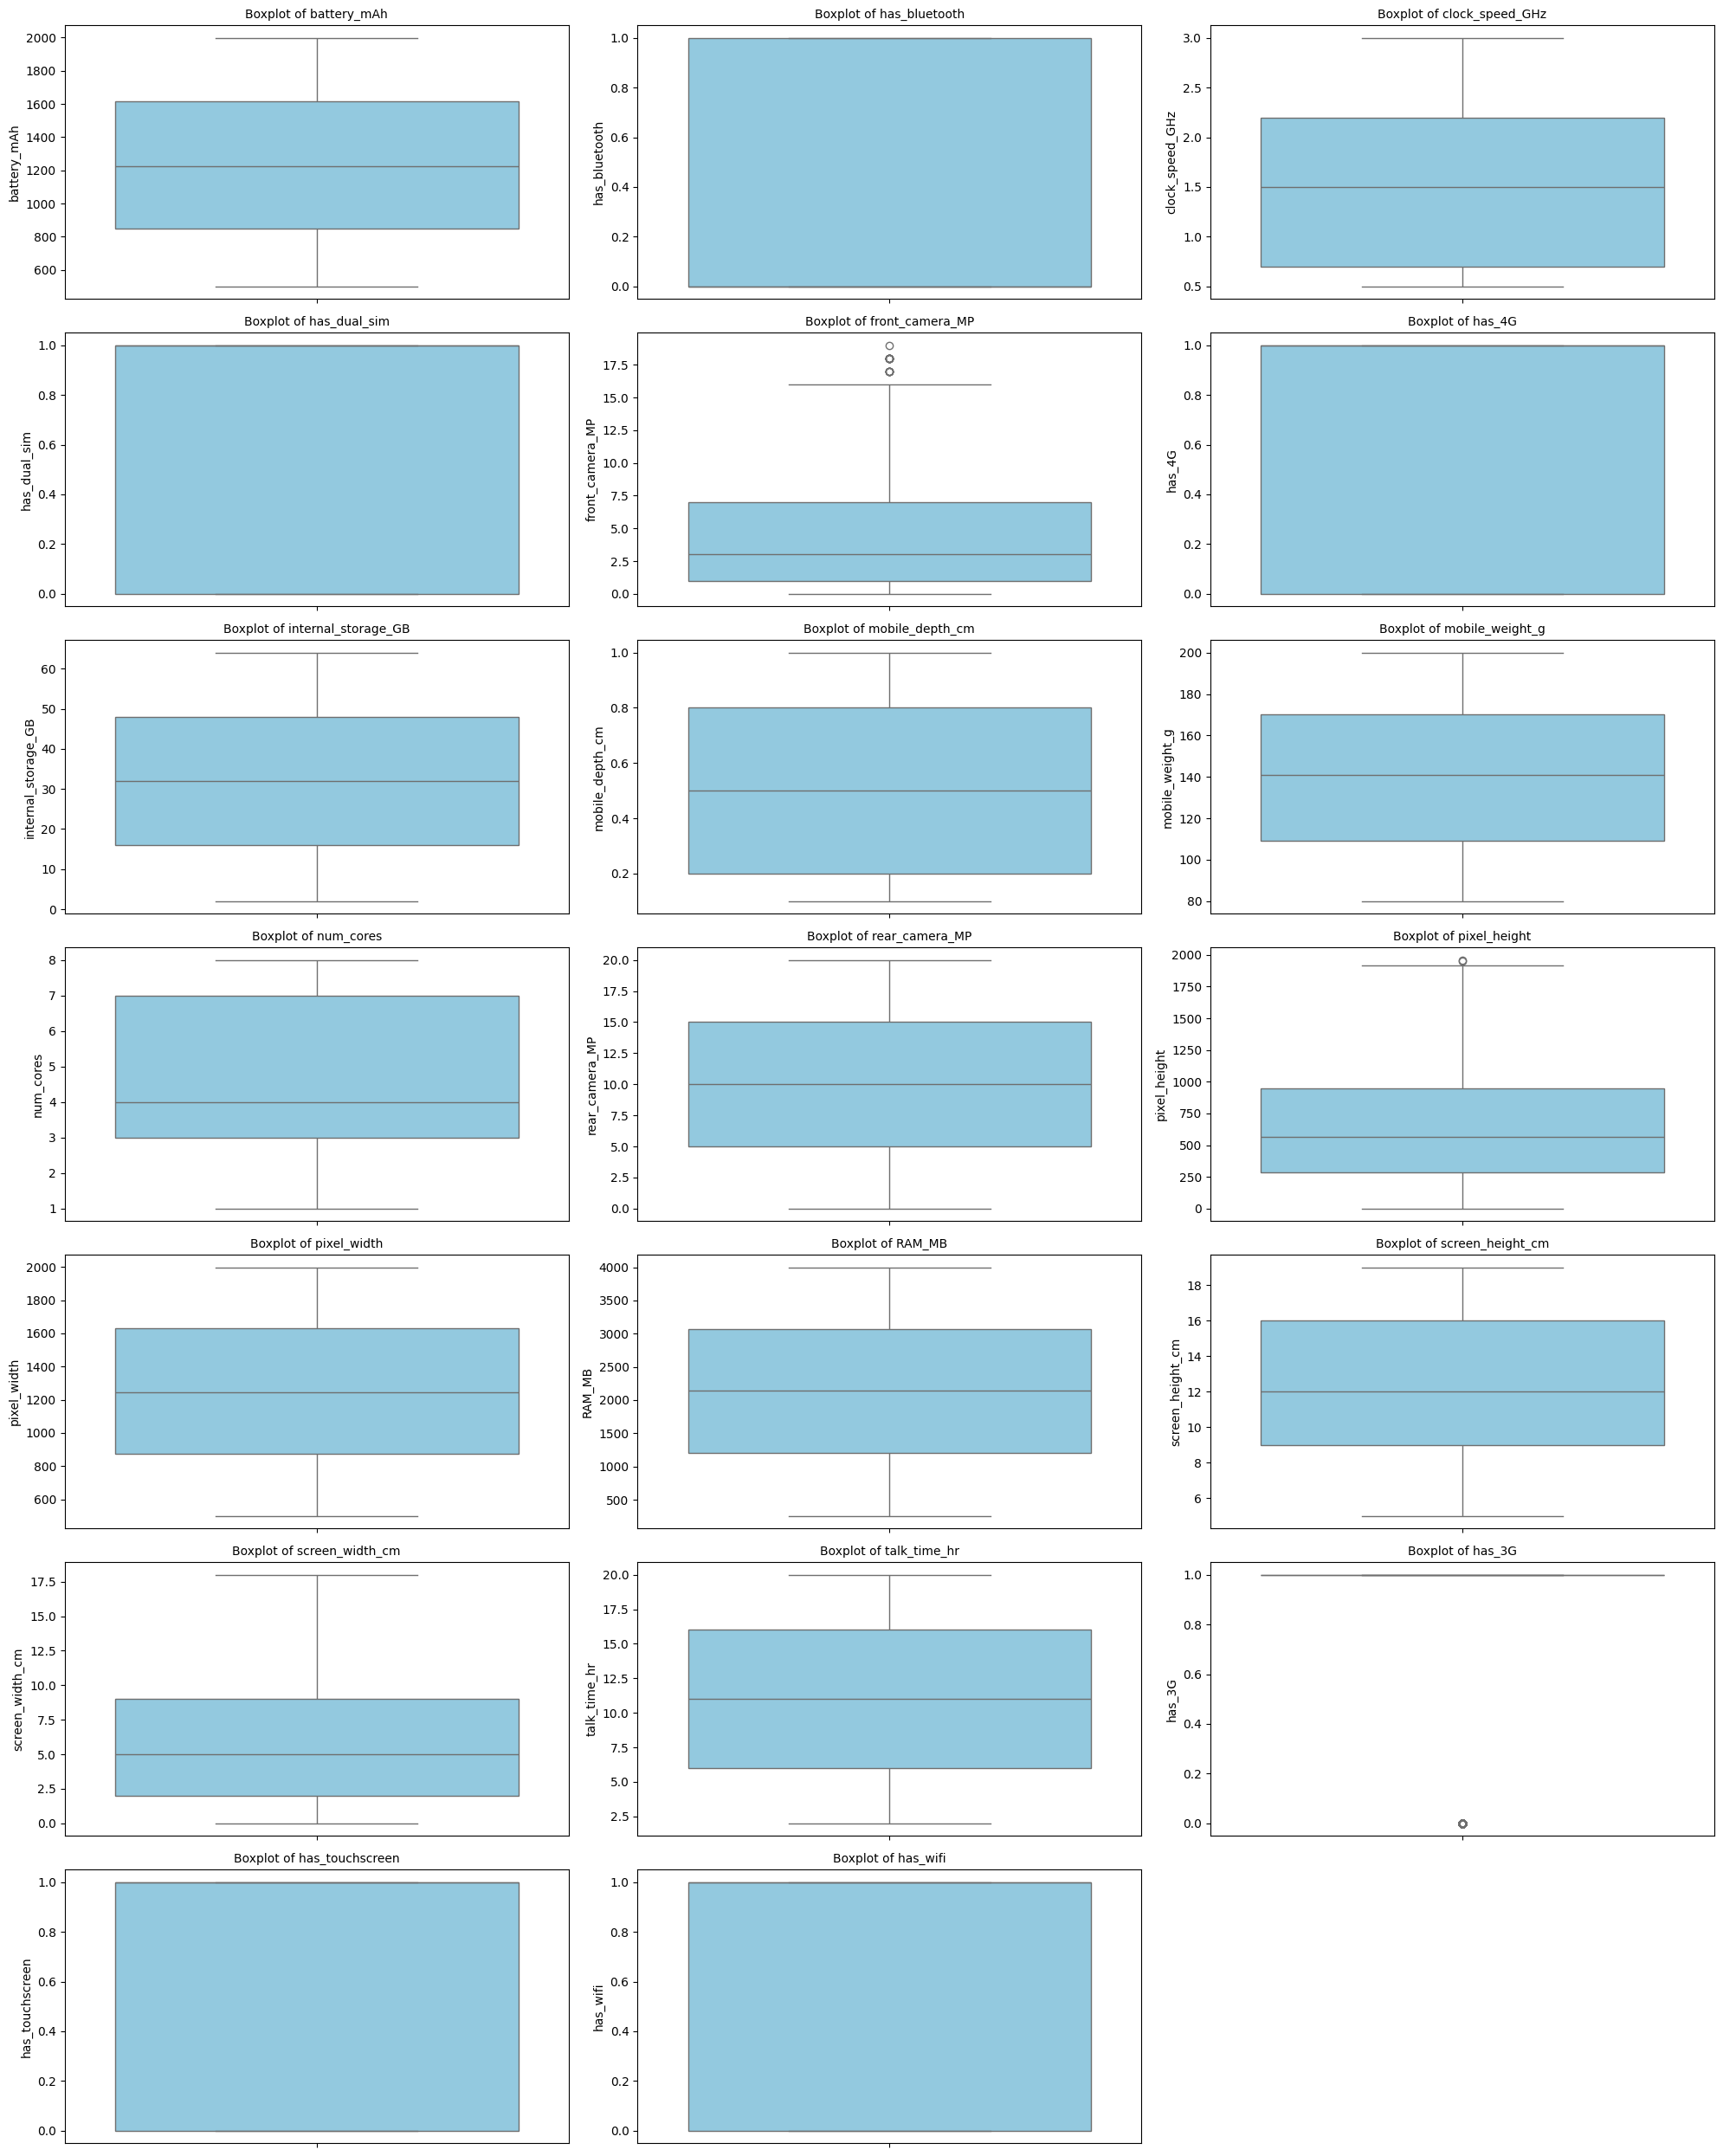

In [41]:
# Drop target for analysis
features = df.drop('price_range', axis=1)

# Plot boxplots for each numeric column
plt.figure(figsize=(20, 25))
for i, col in enumerate(features.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()


#### outliers are present in the front_camera_MP 

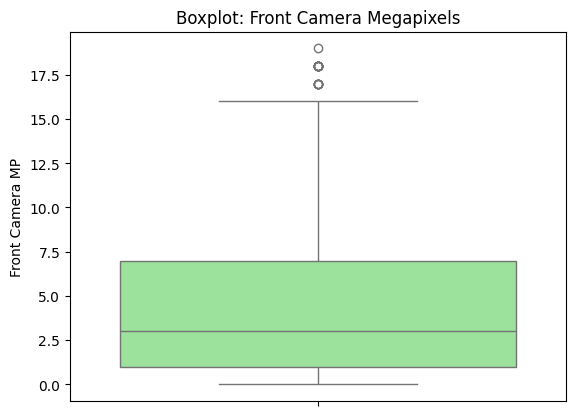

In [42]:
sns.boxplot(y=df['front_camera_MP'], color='lightgreen')
plt.title('Boxplot: Front Camera Megapixels')
plt.ylabel('Front Camera MP')
plt.show()

### Handling Outliers

In [43]:
Q1 = df['front_camera_MP'].quantile(0.25)
Q3 = df['front_camera_MP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(len(df.loc[df.front_camera_MP>upper_bound])/len(df) * 100)

print(len(df.loc[df.front_camera_MP<lower_bound])/len(df) * 100)

0.8999999999999999
0.0


In [44]:
df['front_camera_MP'] = df['front_camera_MP'].apply(lambda x: upper_bound if x > upper_bound else x)


In [45]:
outliers_fc = df[(df['front_camera_MP'] < lower_bound) | (df['front_camera_MP'] > upper_bound)]
print(f"Number of outliers in Front Camera MP: {len(outliers_fc)}")

# Show the actual outlier values
outliers_fc[['front_camera_MP']].sort_values(by='front_camera_MP', ascending=False).head()


Number of outliers in Front Camera MP: 0


,front_camera_MP


#### Plotting Boxplot of Front camera after handling the Outliers

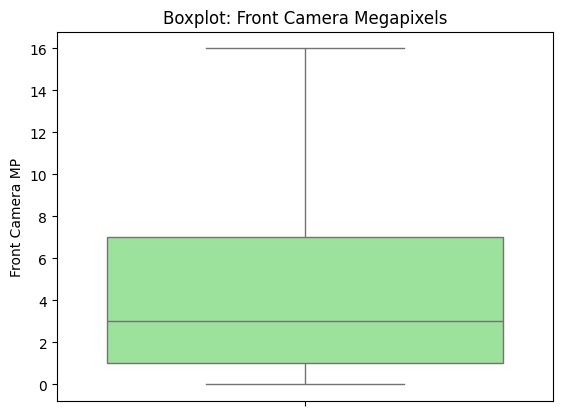

In [46]:
sns.boxplot(y=df['front_camera_MP'], color='lightgreen')
plt.title('Boxplot: Front Camera Megapixels')
plt.ylabel('Front Camera MP')
plt.show()

- Outliers are handled 

### Step 5 :- Exploratory Data Analysis

###  1. Correlation Matrix

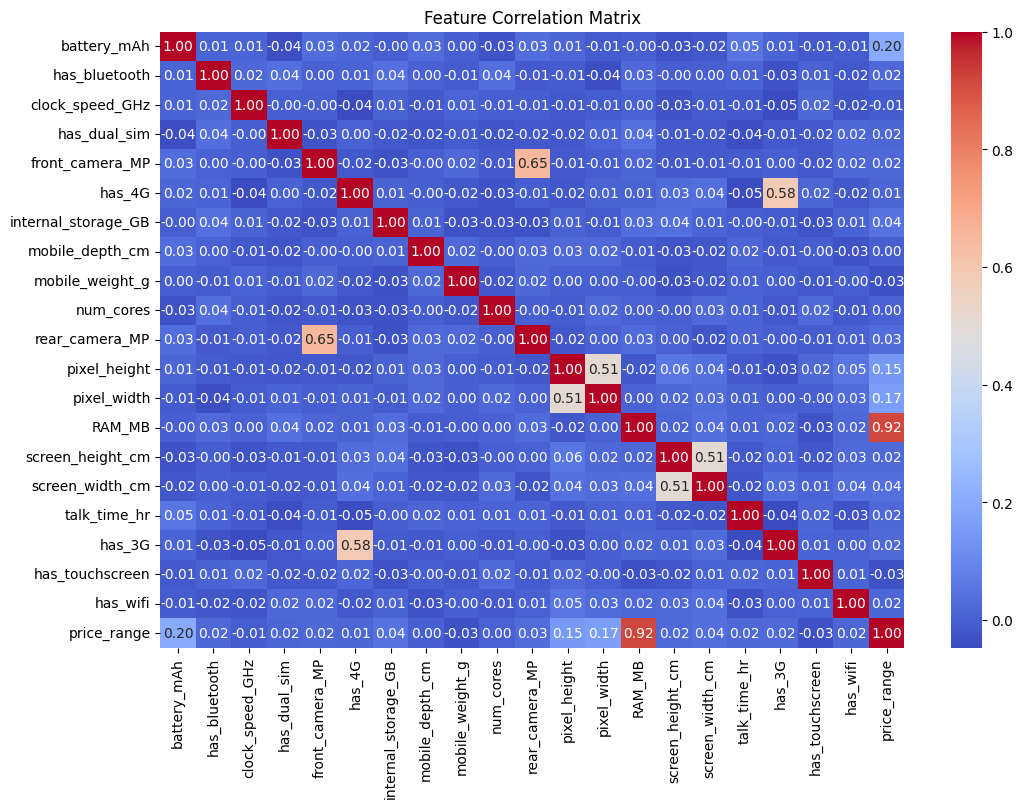

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm') 
plt.title("Feature Correlation Matrix")
plt.show()

In [48]:
df.corr().price_range

battery_mAh            0.200723
has_bluetooth          0.020573
clock_speed_GHz       -0.006606
has_dual_sim           0.017444
front_camera_MP        0.022491
has_4G                 0.014772
internal_storage_GB    0.044435
mobile_depth_cm        0.000853
mobile_weight_g       -0.030302
num_cores              0.004399
rear_camera_MP         0.033599
pixel_height           0.148858
pixel_width            0.165818
RAM_MB                 0.917046
screen_height_cm       0.022986
screen_width_cm        0.038711
talk_time_hr           0.021859
has_3G                 0.023611
has_touchscreen       -0.030411
has_wifi               0.018785
price_range            1.000000
Name: price_range, dtype: float64

### Key Observations:
### High correlation with target (price_range):

- RAM_MB: 0.92 → Very strong predictor
- battery_mAh: 0.20
- pixel_width: 0.17
- pixel_height: 0.15

### Multicollinearity between input features:

- pixel_width and pixel_height: 0.51
- rear_camera_MP and front_camera_MP: 0.65
- screen_height_cm, screen_width_cm, and pixel_width/height: ~0.50

### Columns with low correlation with price_range (≈0.00 or negative):
- These features may not contribute much to prediction:

| Feature               | Correlation with `price_range` |
| -----------------     | ------------------------------ |
| **has_touchscreen**   | 0.03                           |
| **has_wifi**          | 0.02                           |
| **has_3G**            | 0.01                           |
| **has_dual_sim**      | 0.02                           |
| **has_bluetooth**     | 0.02                           |
| **mobile_depth_cm**   | 0.01                           |
| **num_cores**         | 0.01                           |
| **mobile_weight_g**   | 0.03                           |


### 2.  Dropping weak features (to simplify model and avoid noise):

In [49]:
# Dropping low-impact features
features_to_drop = [
    'has_touchscreen',
    'has_wifi',
    'has_3G',
    'has_dual_sim',
    'has_bluetooth',
    'mobile_depth_cm',
    'num_cores',
    'mobile_weight_g'
]

df = df.drop(columns=features_to_drop)
# Dropped features had nearly zero correlation and were rightly removed

In [50]:
df.shape

(2000, 13)

In [51]:
df.head()

,battery_mAh,clock_speed_GHz,front_camera_MP,has_4G,internal_storage_GB,rear_camera_MP,pixel_height,pixel_width,RAM_MB,screen_height_cm,screen_width_cm,talk_time_hr,price_range
0,842,2.2,1.0,0,7,2,20,756,2549,9,7,19,1
1,1021,0.5,0.0,1,53,6,905,1988,2631,17,3,7,2
2,563,0.5,2.0,1,41,6,1263,1716,2603,11,2,9,2
3,615,2.5,0.0,0,10,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13.0,1,44,14,1208,1212,1411,8,2,15,1


Rows: 2000

Columns: (After dropping 8 features) → 13 Features , including 1 Target variable

Data Types: All features are numeric (int or float), including binary ones

### 3.Target Variable Distribution

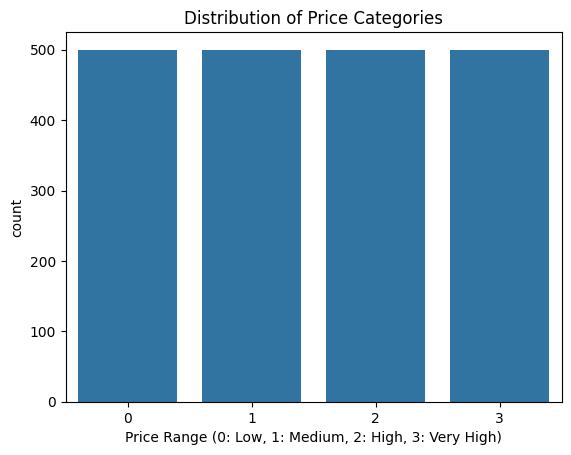

In [52]:
sns.countplot(x='price_range', data=df)
plt.title("Distribution of Price Categories")
plt.xlabel("Price Range (0: Low, 1: Medium, 2: High, 3: Very High)")
plt.show()


#### Target variable is balanced — each price range appears equal.

### 4.Univariate Analysis

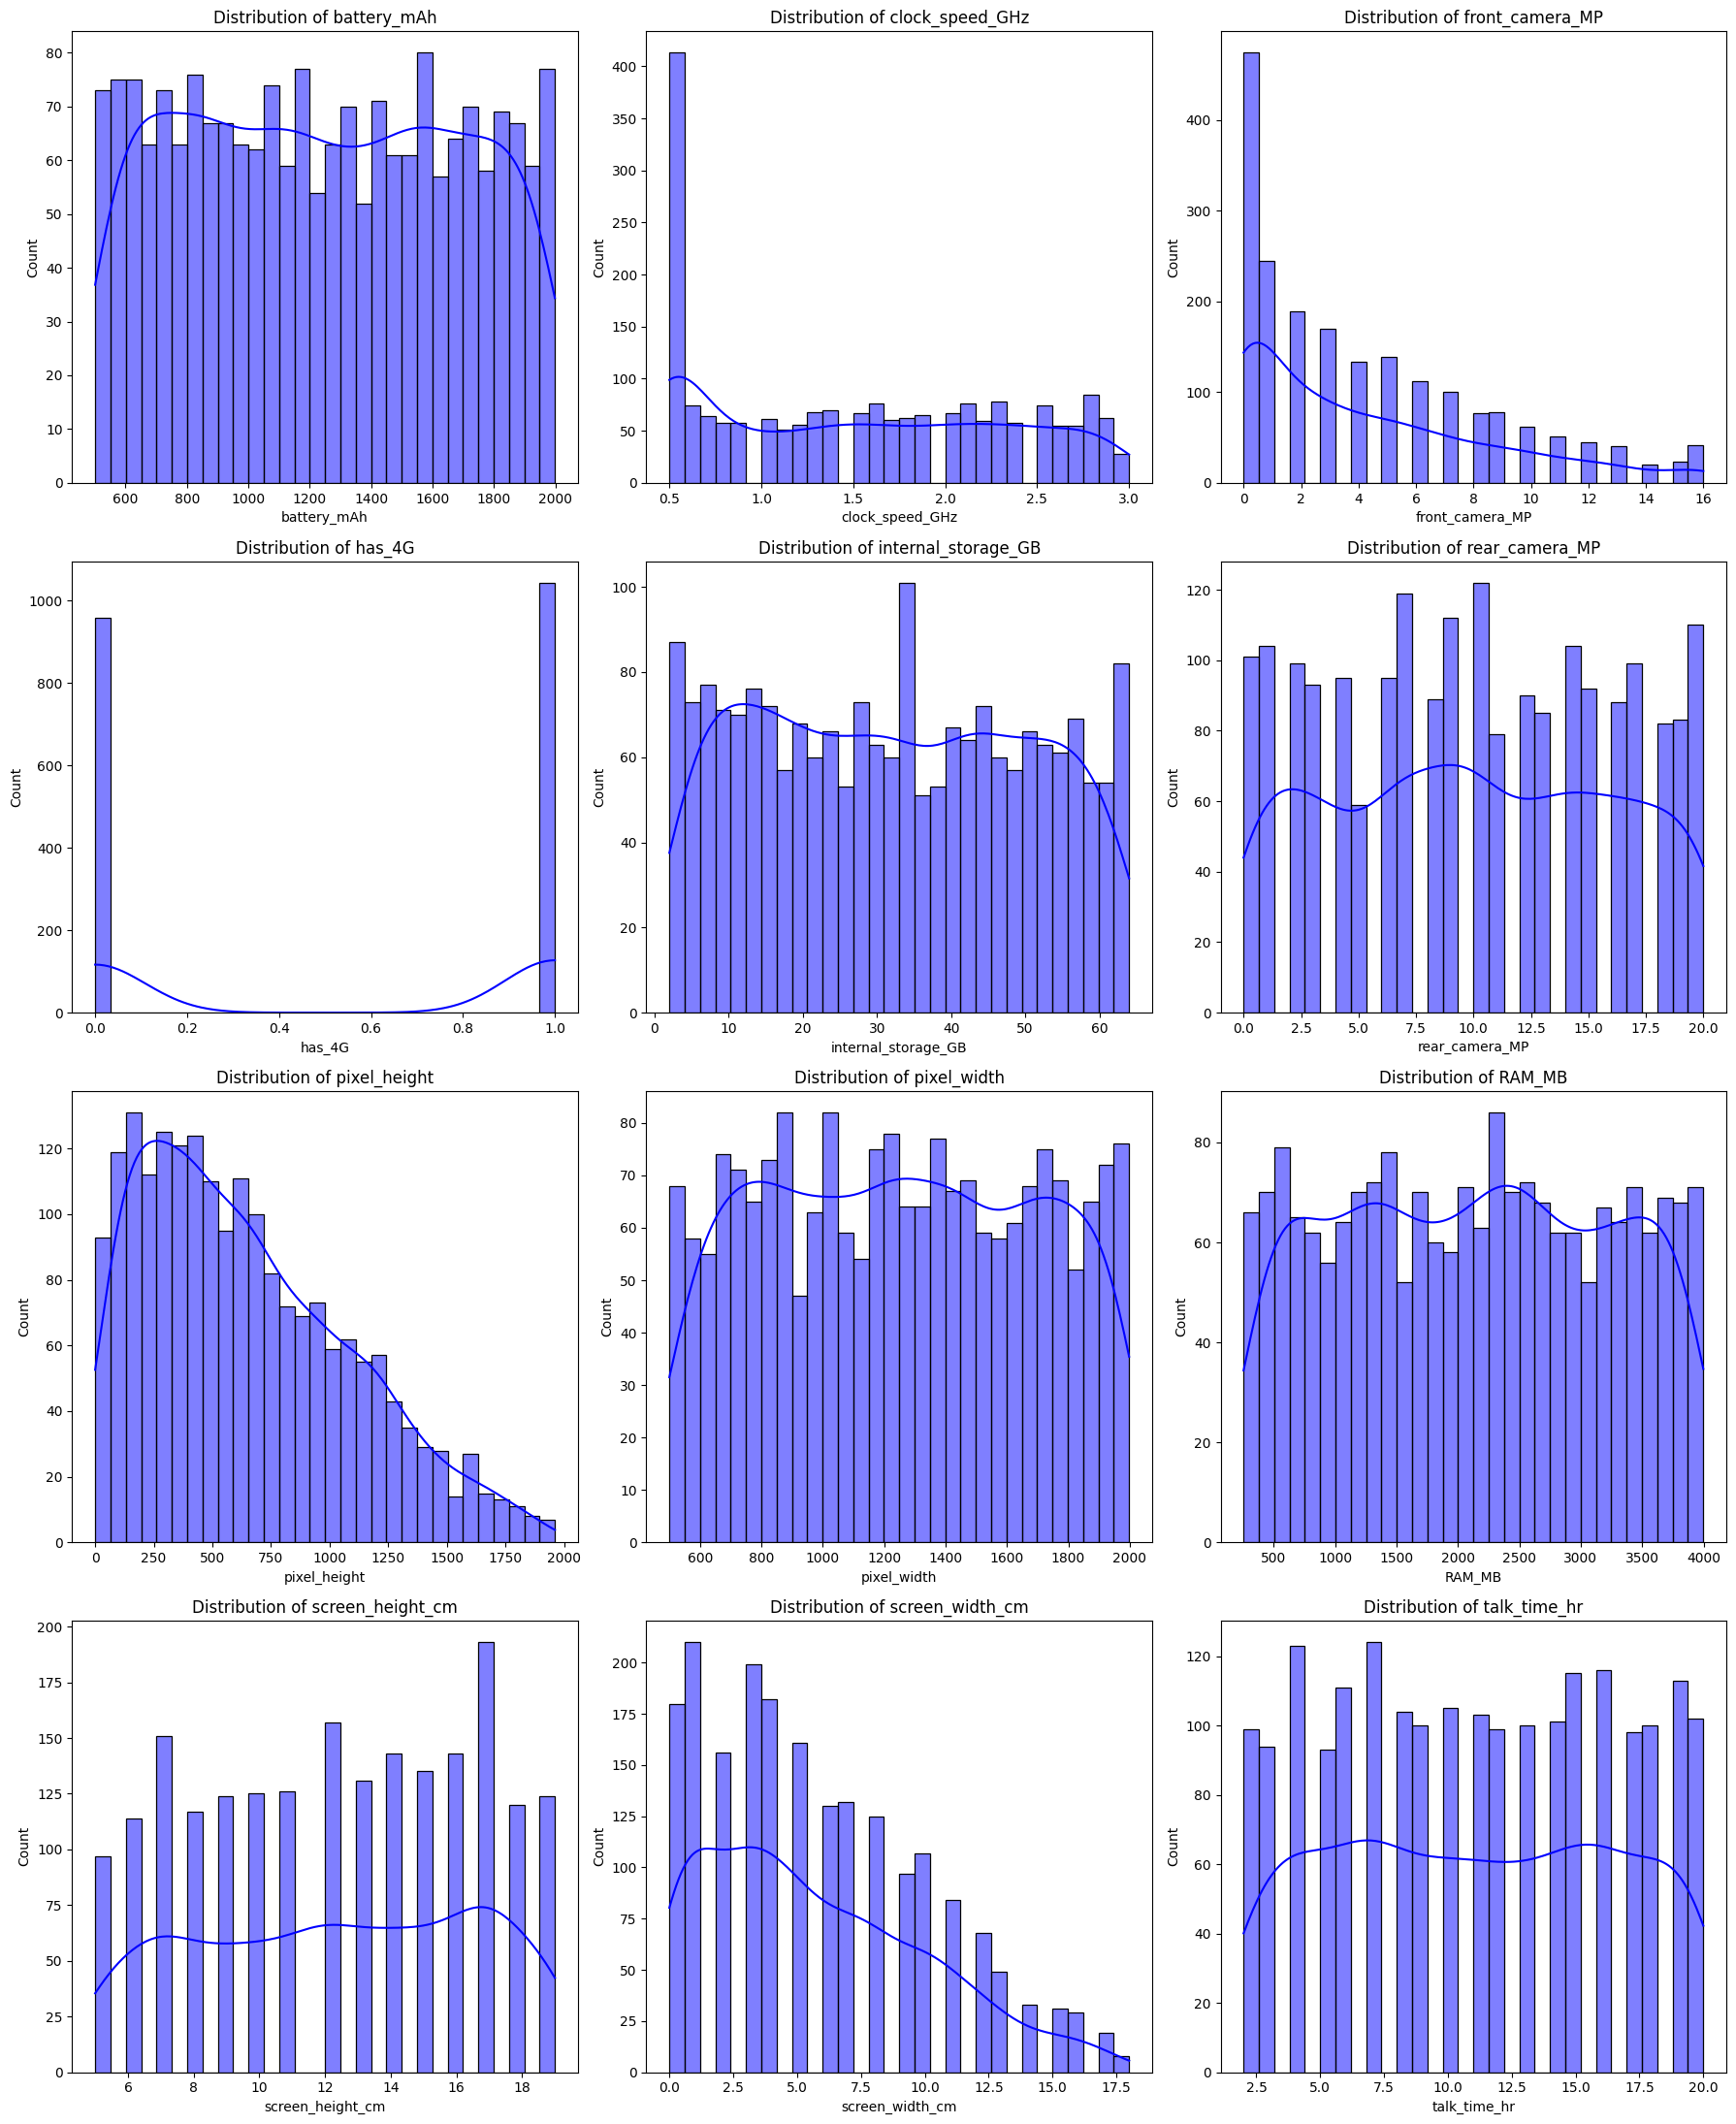

In [53]:
plt.figure(figsize=(18, 22))
plotnumber = 1

for col in df.drop(columns='price_range').columns:
    plt.subplot(4, 3, plotnumber)  # 4 rows × 3 columns = 12 slots
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plotnumber += 1

plt.tight_layout()
plt.show()


### Insights From the distribution
1. battery_mAh → Uniform-like distribution, No significant skewness.
2. clock_speed_GHz → Strong right skew with peak at lower values,Transformation needed (e.g., log or Yeo-Johnson).
3. front_camera_MP → Heavily right-skewed, many values close to 0,Needs transformation to reduce skewness. 
4. has_4G → Binary distribution (0 or 1), No transformation needed,internal_storage_GB,Fairly even distribution.
5. rear_camera_MP → Moderate right skew, long tail,Log transformation recommended.
6. pixel_height → Highly right-skewed with long tail, Should be transformed to reduce skew.
7. pixel_width → Fairly symmetric distribution.No transformation needed.
8. RAM_MB → Nearly uniform distribution.
9. screen_height_cm → Evenly distributed, no clear skew.No transformation required.
10. screen_width_cm → Moderate right skew.Log or Yeo-Johnson transformation can help
11. talk_time_hr → No transformation required.Uniform-like distribution.No significant skewness.


- Logistic Regression assumes that the features are linearly related to the log-odds of the target, and that extremely skewed features or unscaled numeric ranges can impact performance. So we perform transformations to improve model quality.

### Performing Log Transfromation on :

- **clock_speed_GHz**  -   Right-skewed with peak at lower values — log transformation helps normalize.                  
- **front_camera_MP**  -   Strong right skew with many zeros — log transformation reduces skew and makes it more linear. 
- **rear_camera_MP**   -   Right-skewed — log transformation helps normalize.                                            
- **pixel_height**     -   Strong right skew — log transformation will reduce skew and help model convergence.           
- **screen_width_cm**  -   Noticeable right skew — apply log transformation.                                             



### Apply log1p transformation to skewed features

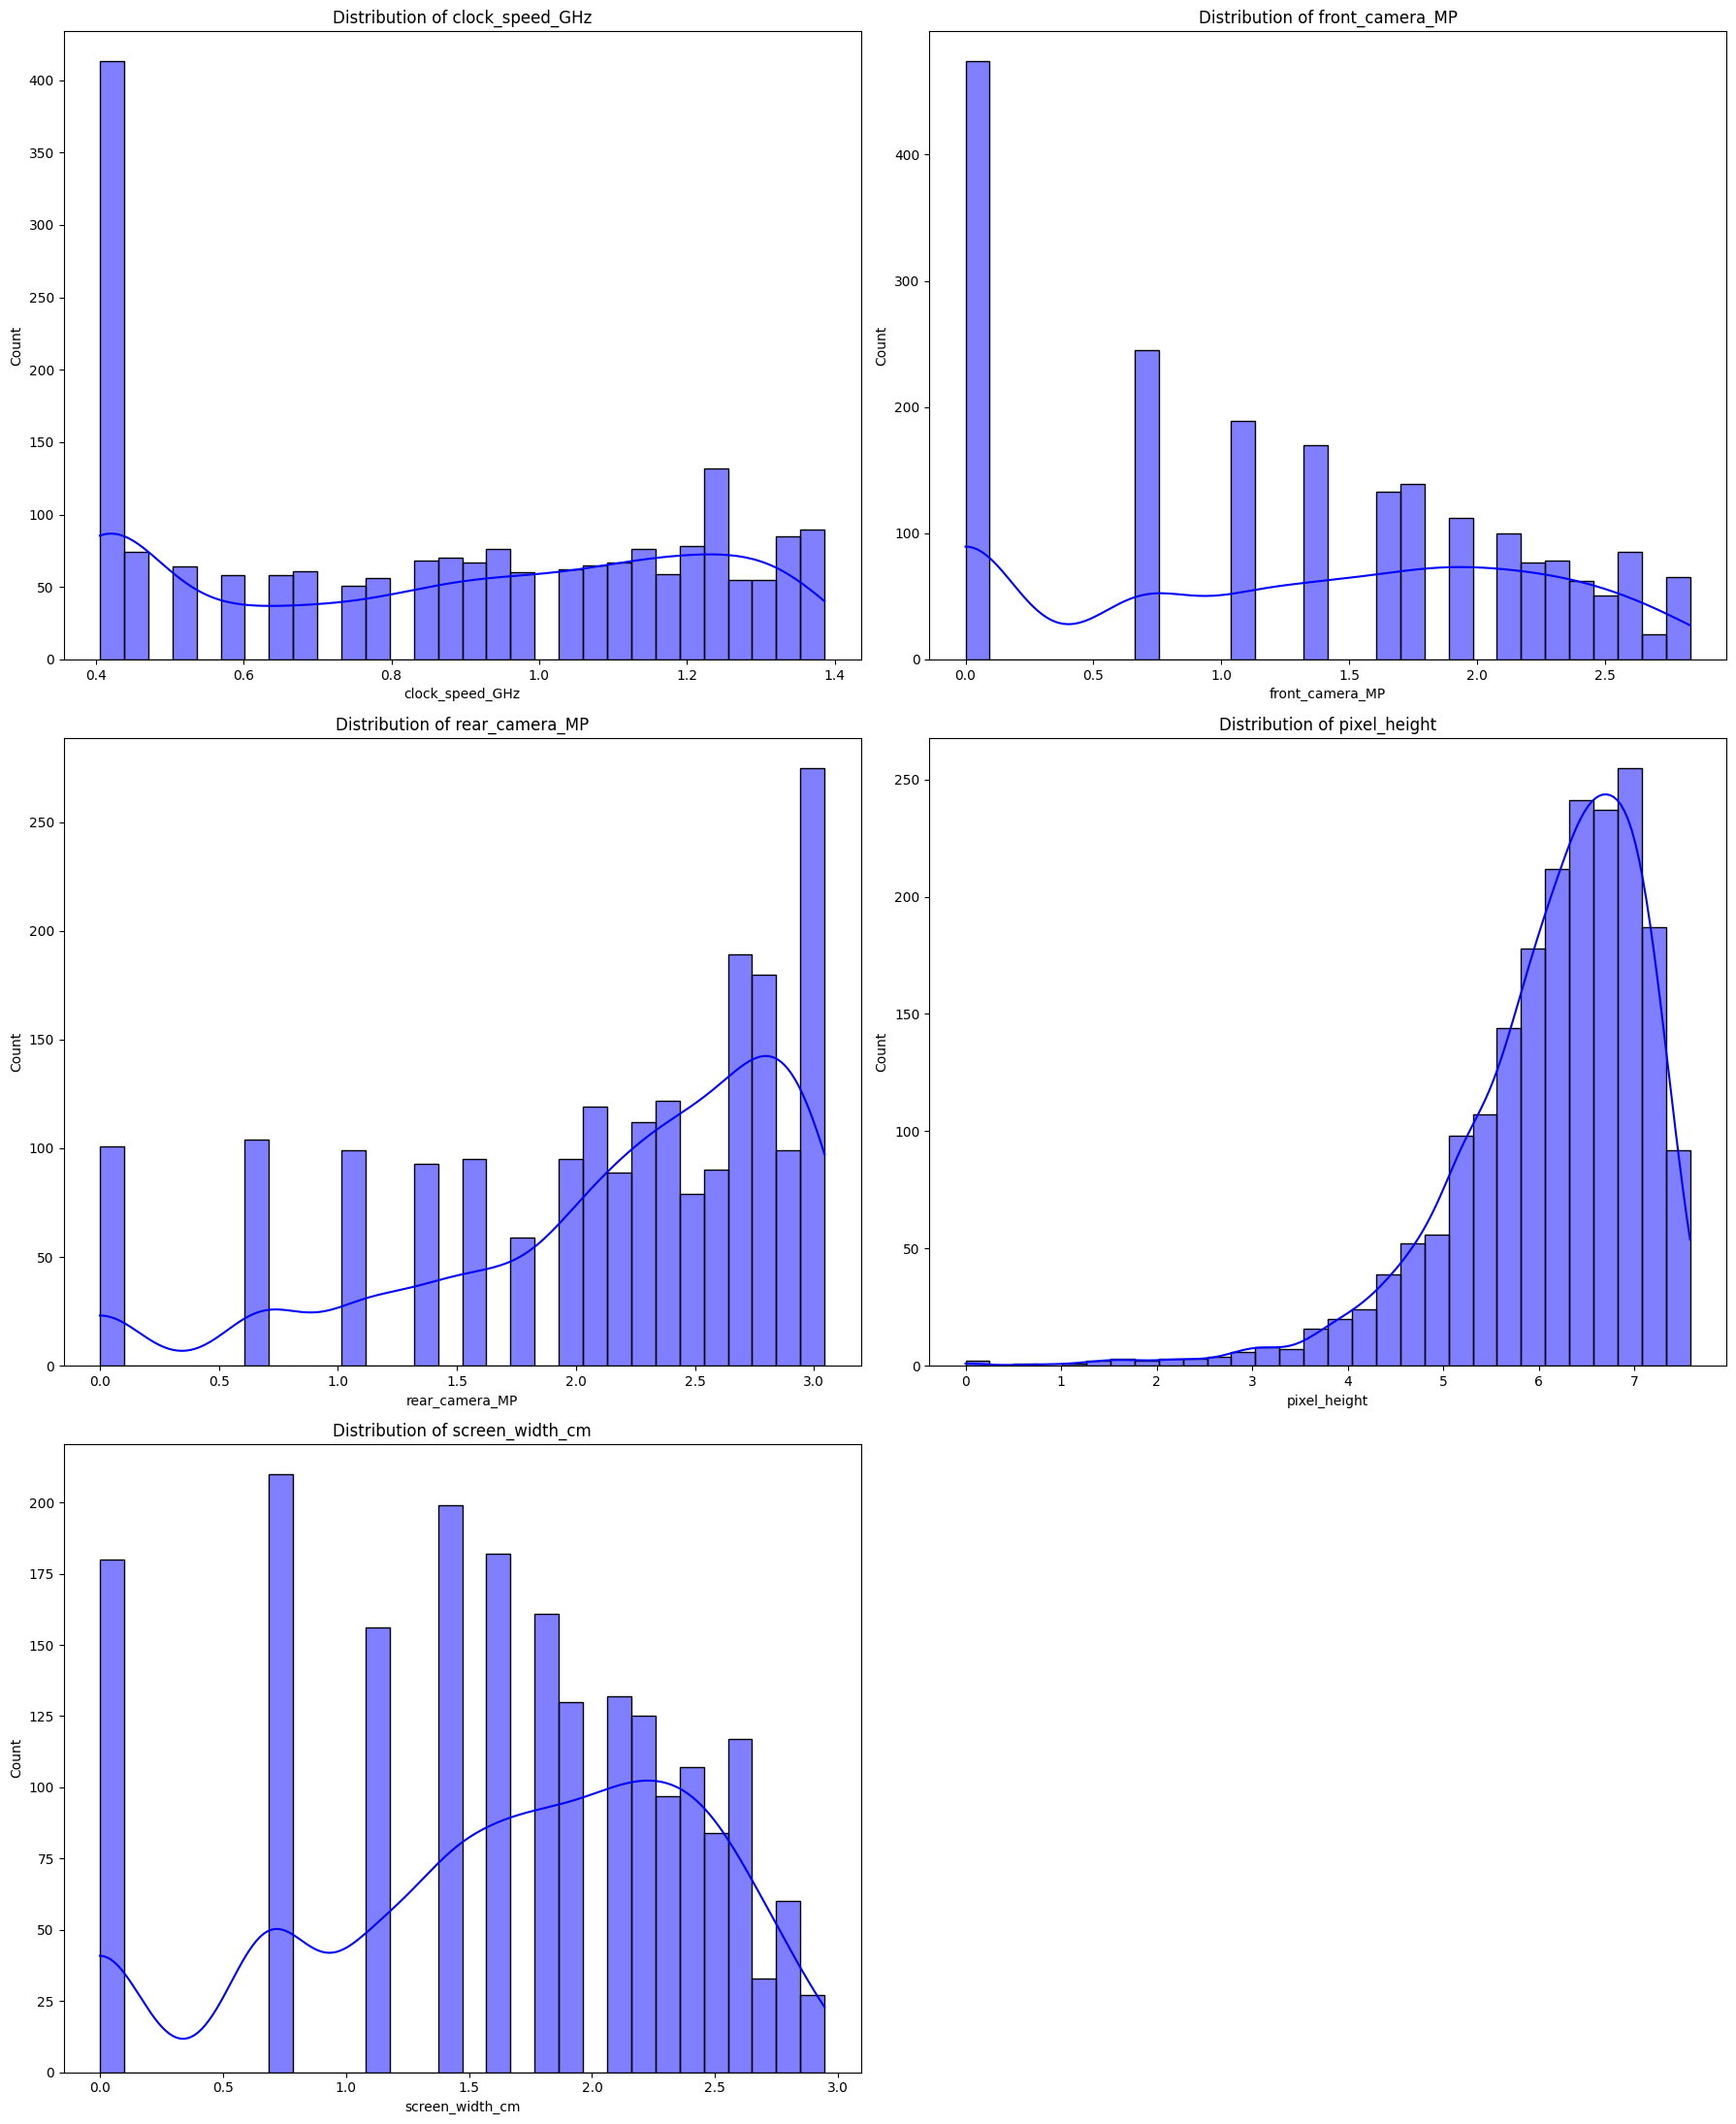

In [54]:
log_transform_cols = [
    'clock_speed_GHz',
    'front_camera_MP',
    'rear_camera_MP',
    'pixel_height',
    'screen_width_cm'
]

for col in log_transform_cols:
    df[col] = np.log1p(df[col])

plt.figure(figsize=(18, 22))
plotnumber = 1

for col in log_transform_cols:
    plt.subplot(3, 2, plotnumber)  # 4 rows × 3 columns = 12 slots
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plotnumber += 1

plt.tight_layout()
plt.show()

- Rear Cameras,Front cameras & Clock Speed →  nicely normalized after log1p()

- Pixel Height & Screen Width → some skew/multimodality remains, but this is acceptable for Logistic Regression as long as they’re scaled (which they are).

- successfully reduced skewness for key features.
- A few features still show minor non-normality, but it's not critical in Logistic Regression. Because we apply scalling further.

### 5.Bivariate Analysis (Feature vs price_range)

##### 1. For Continuous Numerical Features

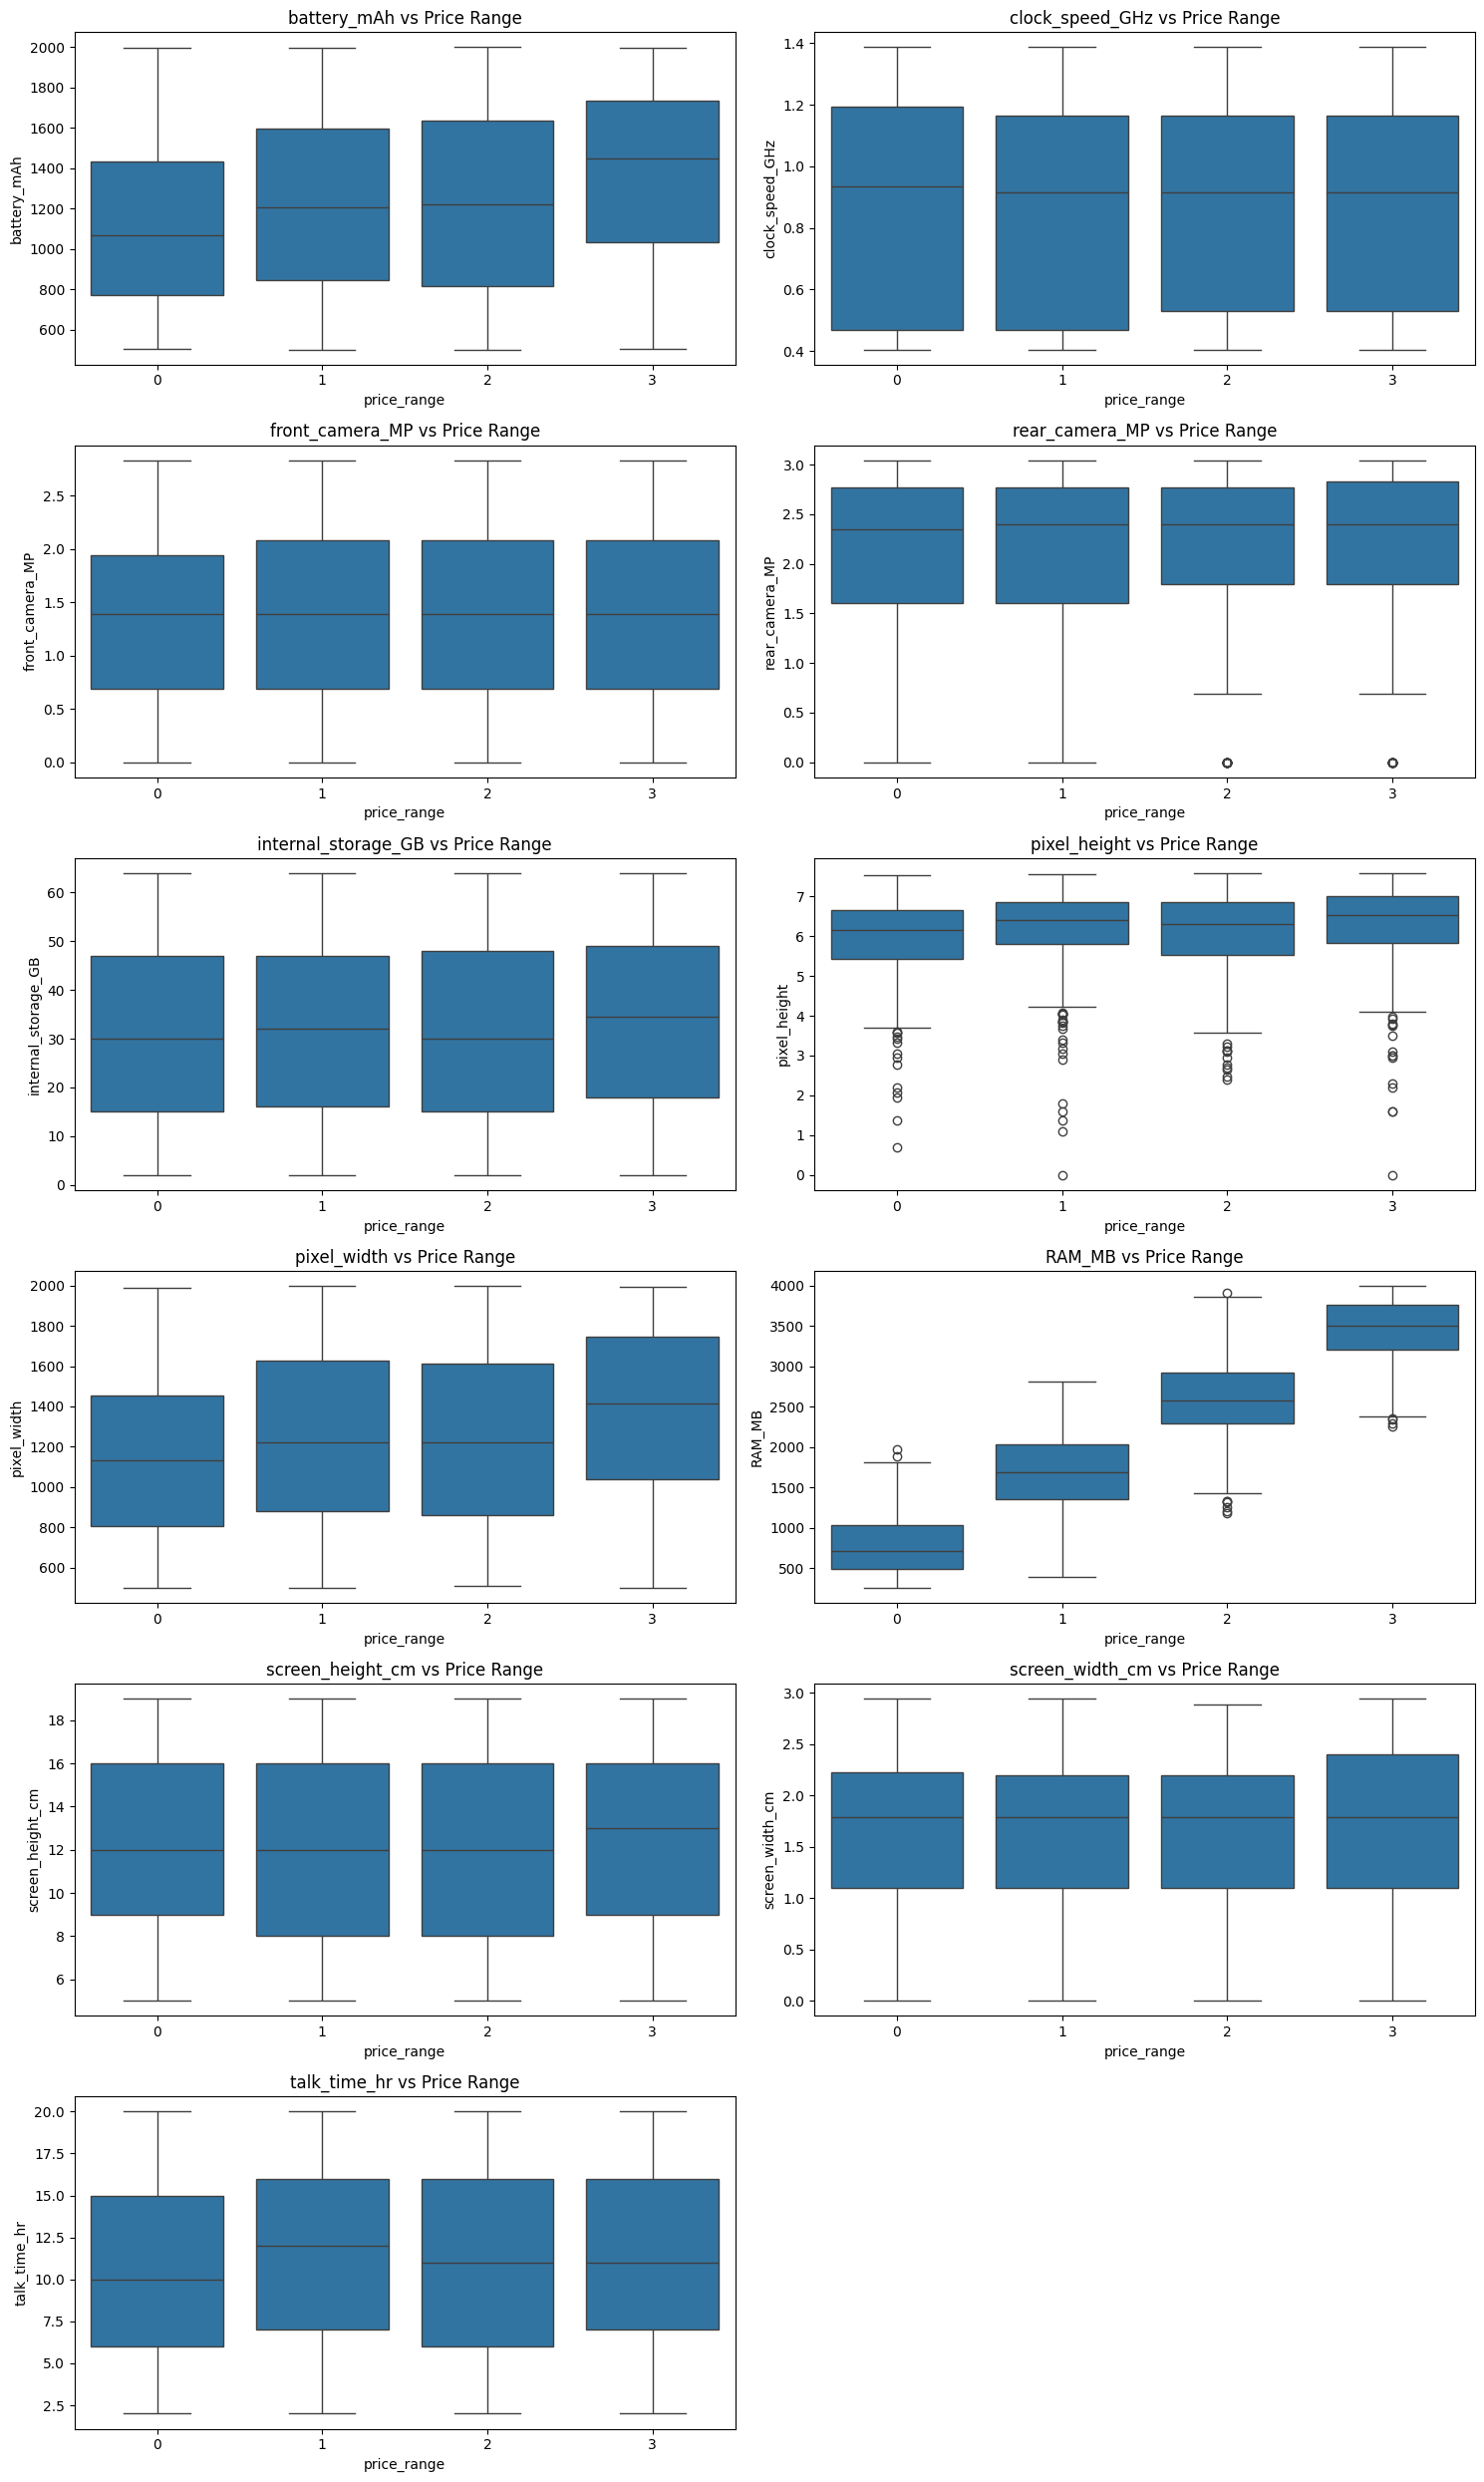

In [55]:
# Numerical features (excluding target and binary features)
num_features = [
    'battery_mAh', 'clock_speed_GHz', 'front_camera_MP', 'rear_camera_MP',
    'internal_storage_GB', 'pixel_height', 'pixel_width', 'RAM_MB',
    'screen_height_cm', 'screen_width_cm', 'talk_time_hr'
]

plt.figure(figsize=(15, 25))
for i, col in enumerate(num_features, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'{col} vs Price Range')
    plt.tight_layout()
plt.show()


### Insights fro  Bivariate Analysis

 
 `battery_mAh`          Median increases with price,Higher battery capacity → higher price range 
 
 `clock_speed_GHz`      Relatively constant across price ranges,Weak relation with price

 `front_camera_MP`      Slight increase in median with price,Higher front camera MP may slightly influence price
    
 `rear_camera_MP`       Slightly higher medians in upper price ranges,Rear camera improves in costlier phones

 `internal_storage_GB`  Median increases with price, More storage → higher priced phones        
 
 `pixel_height`         Clear increase with price , Higher resolution screens in expensive phones
 
 `pixel_width`          Median increases with price, Strong positive correlation with price
 
 `RAM_MB`               Strong increase with price, Very strong predictor — higher RAM → higher price
 
 `screen_height_cm`     Very small variation across price ranges , Weak relationship with price  
    
 `screen_width_cm`      Slightly higher median in high-end phones, Possibly contributes to better display specs

 `talk_time_hr`         Fairly uniform across all price ranges, Not a significant differentiator                                     



###  Strong Predictors:
- RAM_MB
- pixel_width and pixel_height
- battery_mAh
- internal_storage_GB

###  Weak Predictors:
- clock_speed_GHz
- screen_height_cm
- talk_time_hr


##### 2. For Discreet or Categorical feature 

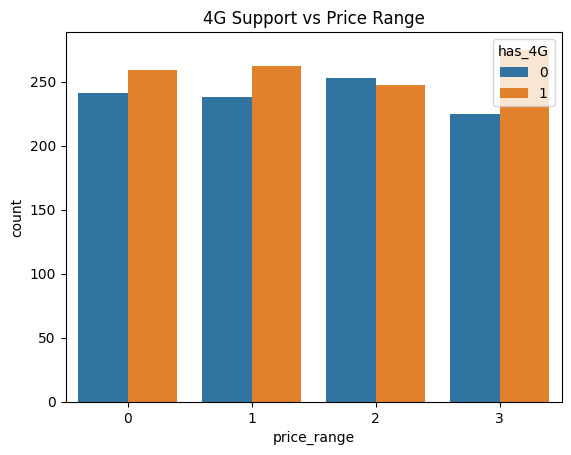

In [56]:
sns.countplot(x='price_range', hue='has_4G', data=df)
plt.title("4G Support vs Price Range")
plt.show()


Across low (0) and medium (1) price ranges, phones with and without 4G are almost equally distributed.

In the high (2) price range, the difference remains negligible, showing that 4G is not exclusive to premium phones.

In the very high (3) price range, more phones have 4G support, indicating that 4G is slightly more common in expensive phones

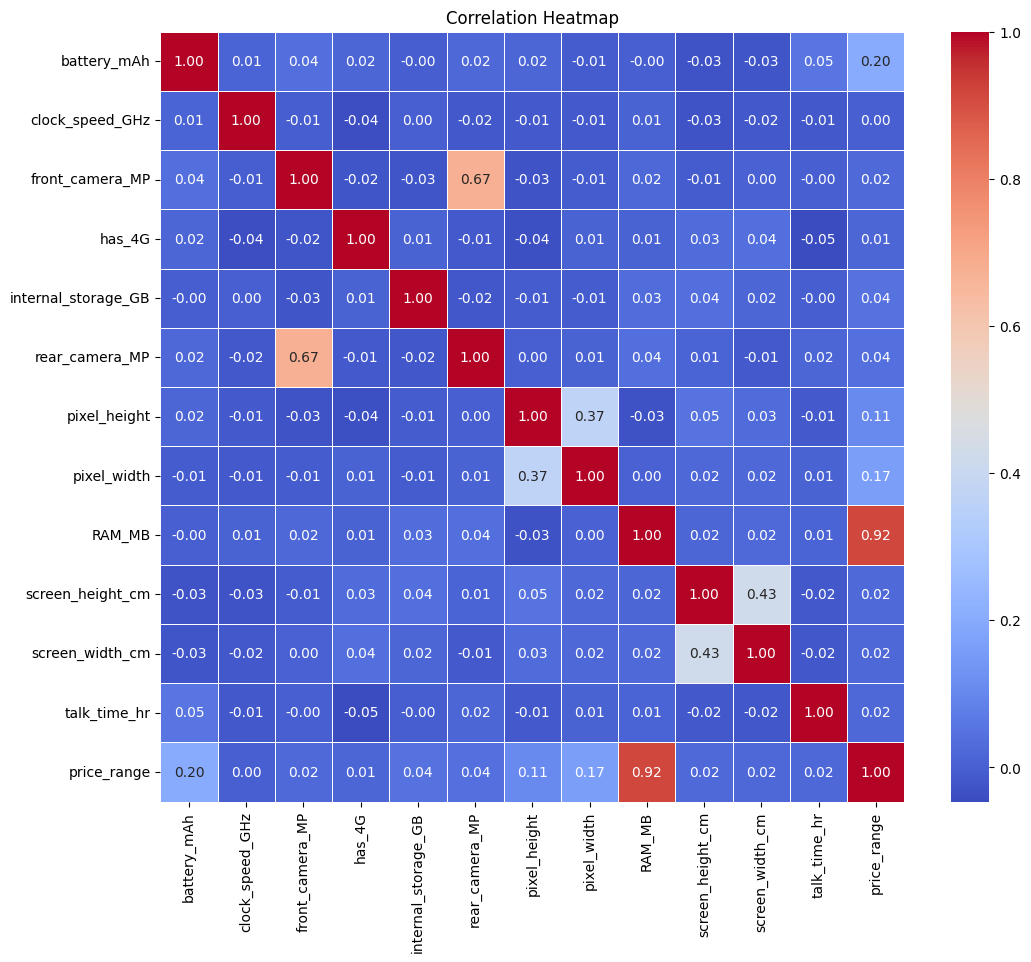

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### Multicollinearity Observed

- front_camera_MP & rear_camera_MP    **0.67**      Strong collinearity — both might convey similar info 
- pixel_height & pixel_width          **0.37**      Display features are moderately correlated           
- screen_height_cm & screen_width_cm  **0.43**      Related physical screen attributes (expected)   

## Step :- 6 Feature Engineering

### Combine Correlated Features

In [58]:
# Create combined features
df['average_camera_MP'] = (df['front_camera_MP'] + df['rear_camera_MP']) / 2
df['total_pixel_resolution'] = df['pixel_width'] * df['pixel_height']
df['screen_area_cm2'] = df['screen_height_cm'] * df['screen_width_cm']

# Drop the original redundant features
df.drop(columns=[
    'front_camera_MP',
    'rear_camera_MP',
    'pixel_width',
    'pixel_height',
    'screen_height_cm',
    'screen_width_cm'
], inplace=True)


#### These transformations will:

Reduce multicollinearity

Simplify the model

Retain interpretability

Improve model stability 

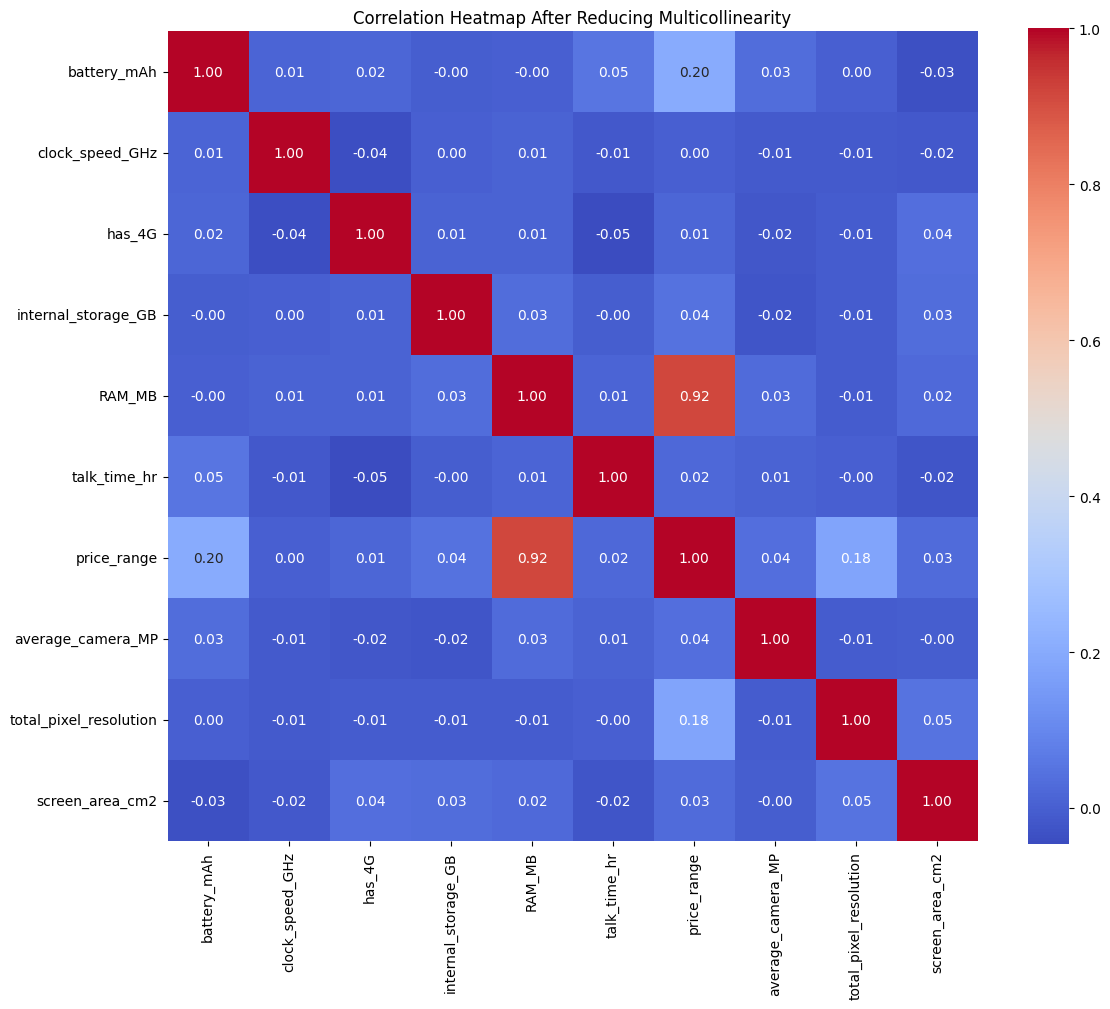

In [59]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap After Reducing Multicollinearity")
plt.tight_layout()
plt.show()

In [60]:
# Move target column to the end
target = 'price_range'
df = df[[col for col in df.columns if col != target] + [target]]

In [61]:
df.head()

,battery_mAh,clock_speed_GHz,has_4G,internal_storage_GB,RAM_MB,talk_time_hr,average_camera_MP,total_pixel_resolution,screen_area_cm2,price_range
0,842,1.163151,0,7,2549,19,0.895880,2301.658963,18.714974,1
1,1021,0.405465,1,53,2631,7,0.972955,13536.370140,23.567004,2
2,563,0.405465,1,41,2603,9,1.522261,12255.734762,12.084735,2
3,615,1.252763,0,10,2769,11,1.151293,12688.001350,35.155593,2
4,1821,0.788457,1,44,1411,15,2.673554,8602.229207,8.788898,1


In [62]:
df.duplicated().sum()

0

In [63]:
df.isnull().sum()

battery_mAh               0
clock_speed_GHz           0
has_4G                    0
internal_storage_GB       0
RAM_MB                    0
talk_time_hr              0
average_camera_MP         0
total_pixel_resolution    0
screen_area_cm2           0
price_range               0
dtype: int64

In [64]:
#  Step 2: Prepare Data
X = df.drop(columns='price_range')
y = df['price_range']
n_classes = len(y.unique())


In [65]:
#  Step 3: Train-Test Split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [66]:
#  Step 4: Scaling
from sklearn.preprocessing import StandardScaler, label_binarize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
#  Step 5: Handle Imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [68]:
#  Step 6: Binarize y_test for ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_train_bin = label_binarize(y_train_smote, classes=[0, 1, 2, 3])

In [69]:
#  Step 7: Define Models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=n_classes, eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}


In [70]:
#  Step 8: Cross-Validation
print("\nCross-validation Results (5-fold):")
cv_results = {}
for name, model in models.items():
    f1_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')
    acc_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    print(f"\nModel: {name}")
    print(f"Mean F1 Macro Score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")
    print(f"Mean Accuracy Score:  {acc_scores.mean():.4f} (+/- {acc_scores.std():.4f})")
    cv_results[name] = [acc_scores.mean(), f1_scores.mean()]



Cross-validation Results (5-fold):

Model: Logistic Regression
Mean F1 Macro Score: 0.9250 (+/- 0.0097)
Mean Accuracy Score:  0.9250 (+/- 0.0097)

Model: Random Forest
Mean F1 Macro Score: 0.8777 (+/- 0.0070)
Mean Accuracy Score:  0.8775 (+/- 0.0070)

Model: XGBoost
Mean F1 Macro Score: 0.9002 (+/- 0.0090)
Mean Accuracy Score:  0.9000 (+/- 0.0088)

Model: SVC
Mean F1 Macro Score: 0.8841 (+/- 0.0149)
Mean Accuracy Score:  0.8838 (+/- 0.0148)

Model: KNN
Mean F1 Macro Score: 0.6387 (+/- 0.0061)
Mean Accuracy Score:  0.6362 (+/- 0.0058)



Test Set Evaluation:

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.92      0.93      0.93       100
           2       0.94      0.91      0.92       100
           3       0.97      0.97      0.97       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



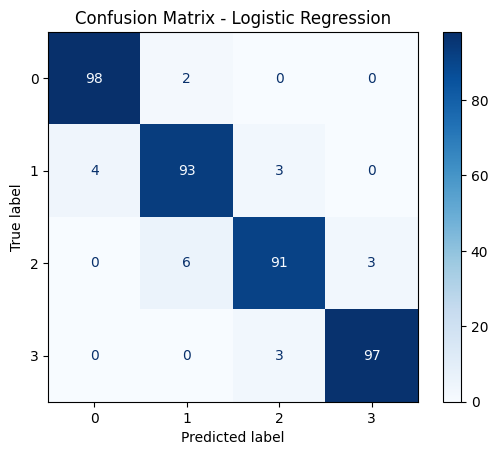


Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.89      0.90      0.90       100
           2       0.87      0.89      0.88       100
           3       0.96      0.93      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



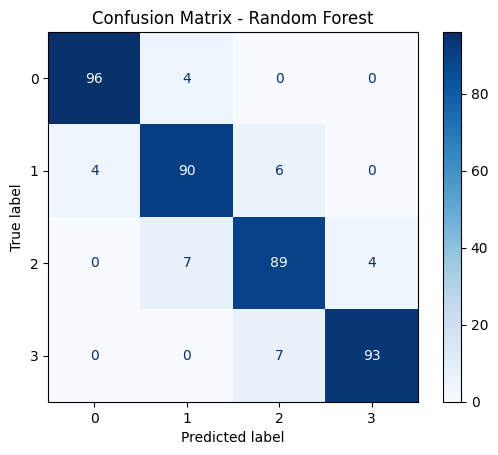


Model: XGBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.93      0.90      0.91       100
           2       0.88      0.91      0.90       100
           3       0.96      0.93      0.94       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



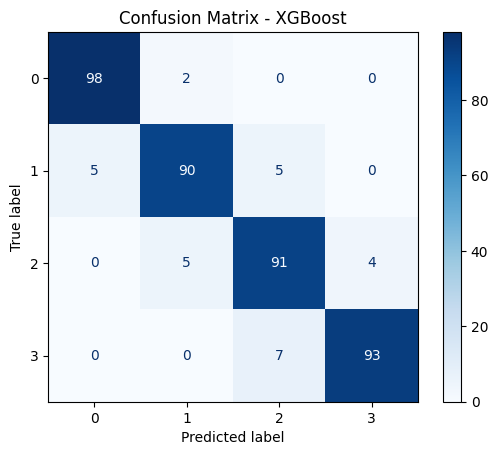


Model: SVC
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.90      0.91      0.91       100
           2       0.91      0.86      0.88       100
           3       0.93      0.96      0.95       100

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



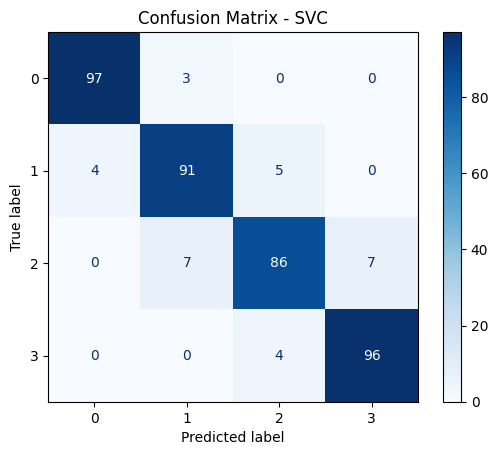


Model: KNN
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.52      0.57      0.55       100
           2       0.55      0.54      0.54       100
           3       0.86      0.76      0.81       100

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



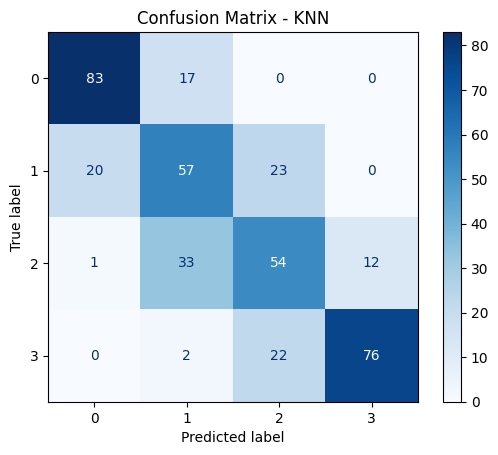

In [71]:
#  Step 9: Model Evaluation
print("\nTest Set Evaluation:")
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_ if name != "XGBoost" else [0, 1, 2, 3])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


### Summary of the Table:
| Model                   | Test Accuracy | Test Macro F1 | CV Accuracy | CV F1 Macro | Comments                                   |
| ----------------------- | ------------- | ------------- | ----------- | ----------- | ------------------------------------------ |
| **Logistic Regression** | **0.95**      | **0.95**      | **0.9250**  | **0.9250**  | Best overall, stable, interpretable        |
| XGBoost                 | 0.93          | 0.93          | 0.9000      | 0.9002      | Excellent, slightly less than LR           |
| SVC                     | 0.93          | 0.92          | 0.8838      | 0.8841      | Good but heavier compute, lower CV         |
| Random Forest           | 0.92          | 0.92          | 0.8775      | 0.8777      | Slightly behind SVC and XGBoost            |
| KNN                     | 0.68          | 0.68          | 0.6362      | 0.6387      | Poor generalization, underfit or sensitive |



Plotting ROC Curve for: Logistic Regression


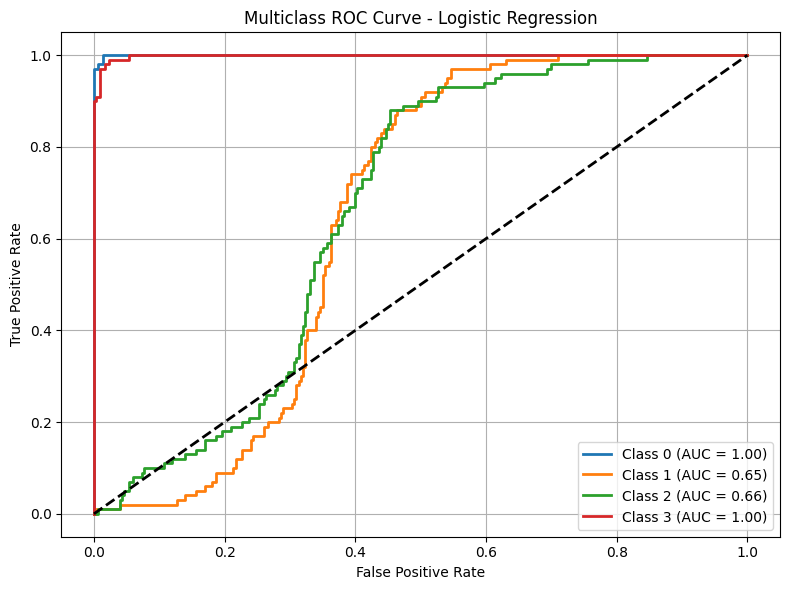


Plotting ROC Curve for: Random Forest


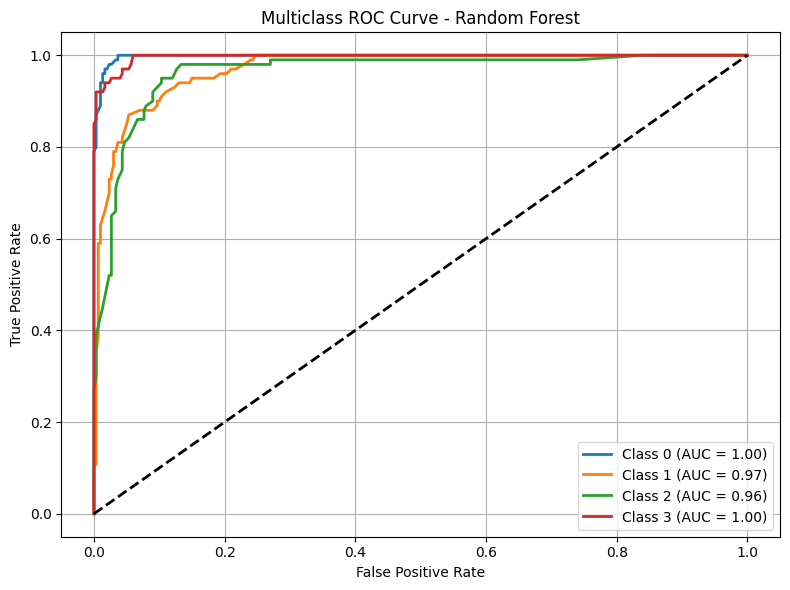


Plotting ROC Curve for: XGBoost


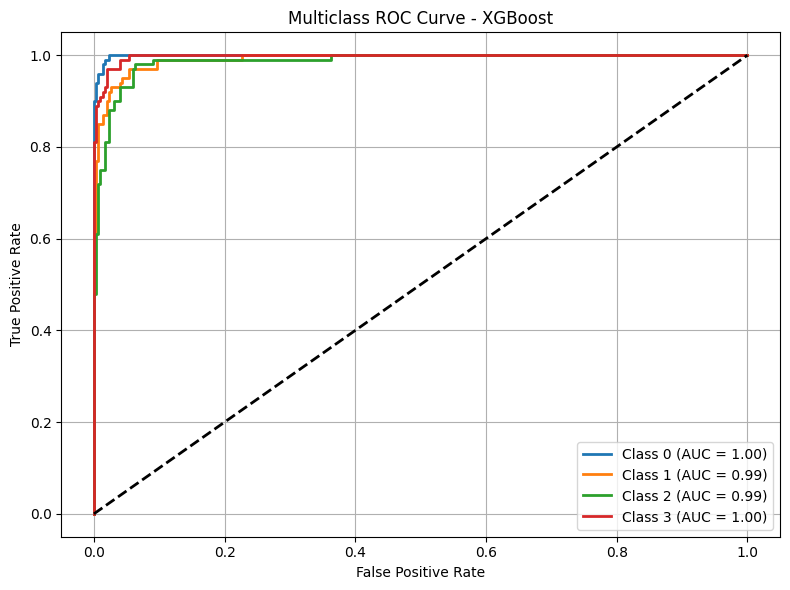


Plotting ROC Curve for: SVC


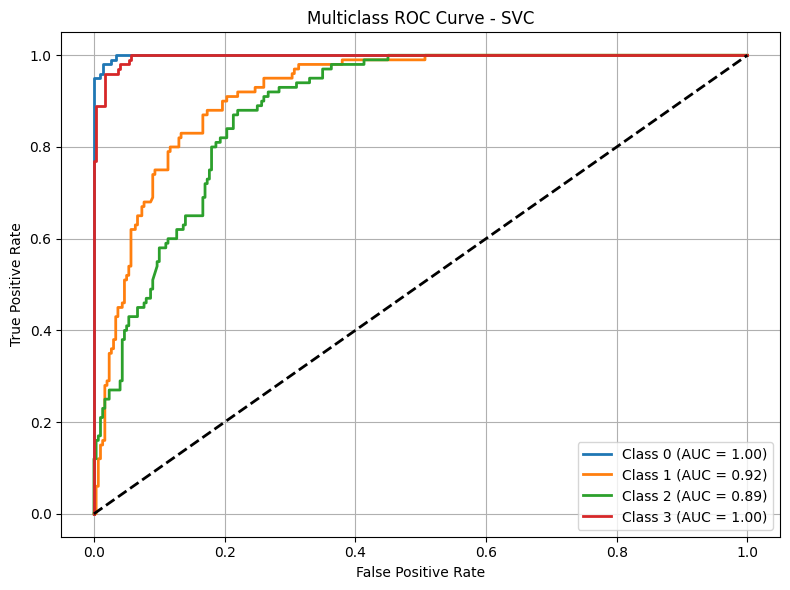


Plotting ROC Curve for: KNN


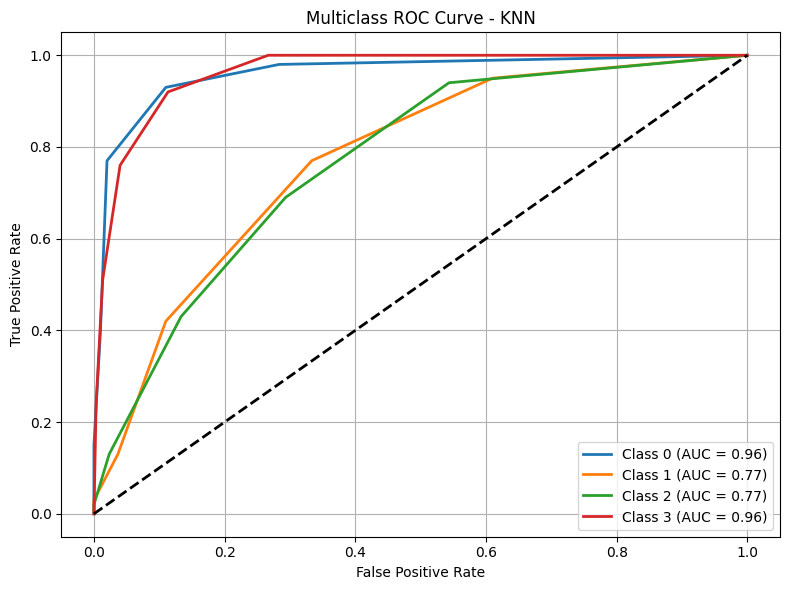

In [72]:
#  Step 10: ROC Curve - One Plot per Model
for name, model in models.items():
    print(f"\nPlotting ROC Curve for: {name}")
    try:
        ovr_model = OneVsRestClassifier(model)
        ovr_model.fit(X_train_smote, y_train_bin)
        y_score = ovr_model.predict_proba(X_test_scaled)

        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.title(f'Multiclass ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except AttributeError:
        print(f"Skipping {name} — does not support predict_proba.")


### ROC-AUC Curve Summary (Per Class) 
| Model                   | Class 0 | Class 1 | Class 2 | Class 3 | **Average AUC** |
| ----------------------- | ------- | ------- | ------- | ------- | --------------- |
| **Logistic Regression** | 1.00    | 0.65    | 0.66    | 1.00    | **0.8275**      |
| **Random Forest**       | 1.00    | 0.97    | 0.96    | 1.00    | **0.9825**      |
| **XGBoost**             | 1.00    | 0.99    | 0.99    | 1.00    | **0.9950**      |
| **SVC**                 | 1.00    | 0.92    | 0.89    | 1.00    | **0.9525**      |
| **KNN**                 | 0.96    | 0.77    | 0.77    | 0.96    | **0.8650**      |


### Insights from ROC-AUC Curve Analysis
#### 1. Logistic Regression : 
- Perfect separation for Class 0 and Class 3 (AUC = 1.00).

- Poorer performance for Class 1 and Class 2 (AUC ~ 0.65).

- Indicates the model struggles to distinguish the middle-price classes.

#### 2. Random Forest
- Excellent AUCs across all classes, especially for mid-range (Class 1 & 2).

- Consistent, strong classifier overall in terms of probability ranking.

#### 3. XGBoost
- Best ROC-AUC overall (avg = 0.995).

- All class AUCs ~0.99–1.00 → almost perfect class separation.

- Indicates highly confident and correct probability predictions.

#### 4. SVC
- Performs strongly overall.

- Slightly lower AUCs for Class 1 and 2 compared to XGBoost/RandomForest.

#### 5. KNN
- Weaker AUCs (~0.77 for Class 1 and 2), suggests less confident predictions.

- Good for boundary classes (Class 0 & 3), but poor on middle classes.


#### XGBoost has the highest AUC (~0.99+) across all classes → best at ranking predictions.

#### Random Forest also performs very well, especially on middle classes.

#### Logistic Regression has perfect AUC for Class 0 & 3, but low (~0.65–0.66) for Class 1 & 2.

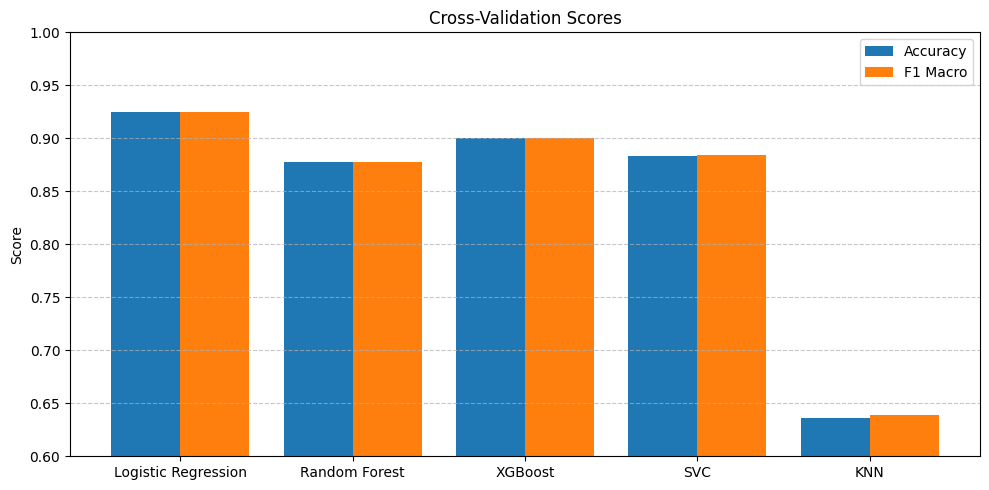

In [73]:
#  Step 11: Plot Cross-Validation Summary
models_list = list(cv_results.keys())
acc_scores = [v[0] for v in cv_results.values()]
f1_scores = [v[1] for v in cv_results.values()]

x = range(len(models_list))
plt.figure(figsize=(10, 5))
plt.bar(x, acc_scores, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Macro', align='center')
plt.xticks([i + 0.2 for i in x], models_list)
plt.ylim(0.6, 1.0)
plt.title('Cross-Validation Scores')
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [74]:
# Create a summary table of performance metrics
model_summary = []

# Manually input test set and CV scores for each model
model_results = {
    "Logistic Regression": {
        "test_accuracy": 0.95,
        "test_f1_macro": 0.947,
        "cv_accuracy": 0.9250,
        "cv_f1_macro": 0.9250
    },
    "Random Forest": {
        "test_accuracy": 0.92,
        "test_f1_macro": 0.920,
        "cv_accuracy": 0.8775,
        "cv_f1_macro": 0.8777
    },
    "XGBoost": {
        "test_accuracy": 0.93,
        "test_f1_macro": 0.930,
        "cv_accuracy": 0.9000,
        "cv_f1_macro": 0.9002
    },
    "SVC": {
        "test_accuracy": 0.93,
        "test_f1_macro": 0.925,
        "cv_accuracy": 0.8838,
        "cv_f1_macro": 0.8841
    },
    "KNN": {
        "test_accuracy": 0.68,
        "test_f1_macro": 0.678,
        "cv_accuracy": 0.6362,
        "cv_f1_macro": 0.6387
    }
}

# Build DataFrame
import pandas as pd
for model, scores in model_results.items():
    model_summary.append({
        "Model": model,
        "Test Accuracy": scores["test_accuracy"],
        "Test F1 Macro": scores["test_f1_macro"],
        "CV Accuracy": scores["cv_accuracy"],
        "CV F1 Macro": scores["cv_f1_macro"]
    })

summary_df = pd.DataFrame(model_summary)
summary_df = summary_df.sort_values(by='CV F1 Macro', ascending=False)
print("\n Model Comparison Summary:")
print(summary_df.to_string(index=False))

# Highlight best model
best_model = summary_df.iloc[0]["Model"]
print(f"\n Best Performing Model: {best_model}")



 Model Comparison Summary:
              Model  Test Accuracy  Test F1 Macro  CV Accuracy  CV F1 Macro
Logistic Regression           0.95          0.947       0.9250       0.9250
            XGBoost           0.93          0.930       0.9000       0.9002
                SVC           0.93          0.925       0.8838       0.8841
      Random Forest           0.92          0.920       0.8775       0.8777
                KNN           0.68          0.678       0.6362       0.6387

 Best Performing Model: Logistic Regression


##### Despite XGBoost showing higher ROC-AUC, I am  choosing Logistic Regression based on a holistic evaluation:
| Criteria                    | Logistic Regression | XGBoost |
| --------------------------- | ------------------- | ------- |
| Accuracy                    |  0.95               | 0.93    |
| Macro F1-Score              |  0.95               | 0.93    |
| Cross-Val Accuracy (5-fold) |  0.925              | 0.900   |
| Cross-Val F1-Macro (5-fold) |  0.925              | 0.900   |
| ROC-AUC (Avg)               |  0.827              | 0.995   |


### Explanation:

- Generalization matters more than perfect probability scores on the test set.

- Logistic Regression performs consistently across CV folds, not just on the test set.

- It is less complex, easier to interpret, and still gives excellent performance.

- ROC-AUC is about ranking, but F1/Accuracy are more direct measures of actual prediction performance — and logistic regression   performs better there.
- Highest accuracy (0.95) and F1-score (0.95) on test set.

- Best cross-validation performance, meaning strong generalization to unseen data.

- Simpler, faster, and more interpretable model.

-  ROC-AUC is lower than XGBoost, but prediction correctness is better — which matters more in classification.


### Final Conclusion on Choosing The Best Model
- While XGBoost has superior ROC-AUC (due to confident probability ranking), Logistic Regression is the best overall classifier in our case because:
 
- It predicts more accurately (F1-score and accuracy).
 
- It is simpler and generalizes better (CV performance).
 
- ROC-AUC reveals that it struggles slightly in Class 1 & 2, but that doesn’t hurt the prediction metrics significantly.

### Hyperparameter Tuning For Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],  # Both support 'multinomial'
    'multi_class': ['multinomial']
}

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-balanced and scaled data
grid_search.fit(X_train_smote, y_train_smote)

# Best Parameters and Score
print(" Best Parameters:", grid_search.best_params_)
print(" Best F1 Macro Score:", grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best Parameters: {'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
 Best F1 Macro Score: 0.9286966631291598


 Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.94      0.93      0.93       100
           2       0.94      0.91      0.92       100
           3       0.97      0.97      0.97       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



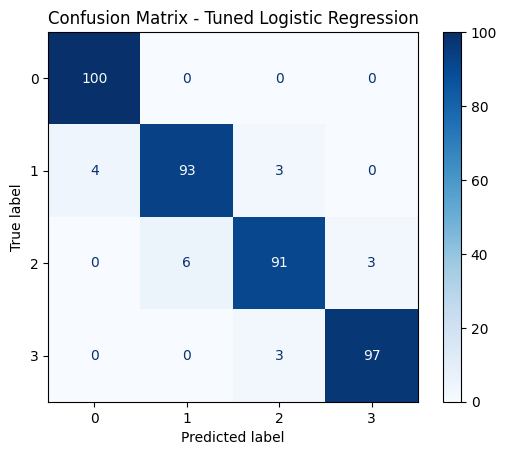

In [76]:
# Re-train best model on full training data
best_model = grid_search.best_estimator_
best_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(" Classification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()


### Performance Metrics (Post-Tuning):

| Metric             | Value  |
| ------------------ | ------ |
| **Accuracy**       | 0.95   |
| **Macro F1 Score** | 0.95   |
| **Best CV F1**     | 0.9287 |


### Classification Report:
All four classes show strong performance.

Classes 0 and 3 have f1-scores close to 0.98–0.97, indicating high separability.

Class 1 and 2 slightly lower, but still above 0.91, which is acceptable.



**Tuned Logistic Regression is now clearly the best model** for  cell phone price classification task.

It’s:

- More accurate across all classes

- Simpler and faster

- Interpretable

- Robust even for the edge classes (0 & 3)

### ROC-AUC Curve for Tuned Logistic Regression


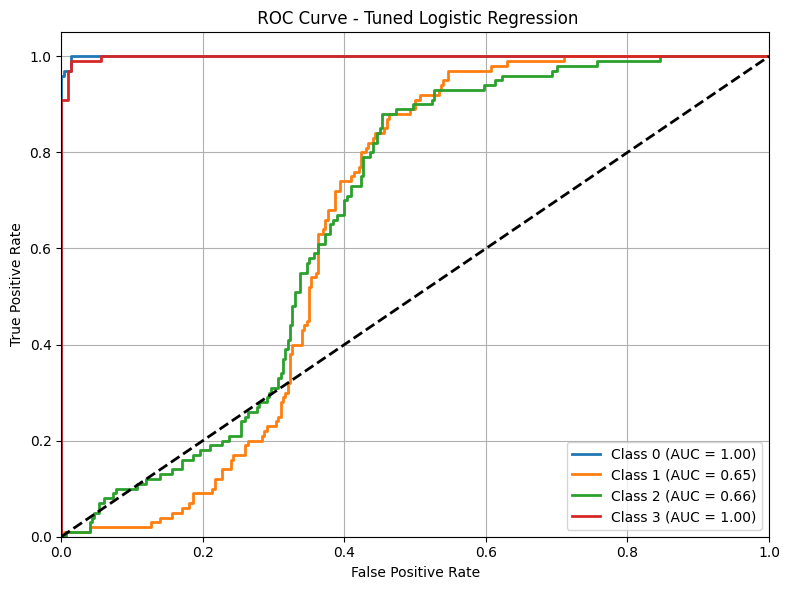

In [77]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the test labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Wrap best model in OneVsRestClassifier
ovr_model = OneVsRestClassifier(best_model)
ovr_model.fit(X_train_smote, label_binarize(y_train_smote, classes=[0, 1, 2, 3]))

# Predict probabilities
y_score = ovr_model.predict_proba(X_test_scaled)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve - Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Verdict

**Tuned Logistic Regression is the best model** for this cellphone price classification task because it:

- Achieves balanced, high performance across classes.

- Has strong cross-validation metrics.

- Provides robust generalization with minimal complexity.

- Is easier to interpret, maintain, and explain to stakeholders.

In [ ]:
pip install shap

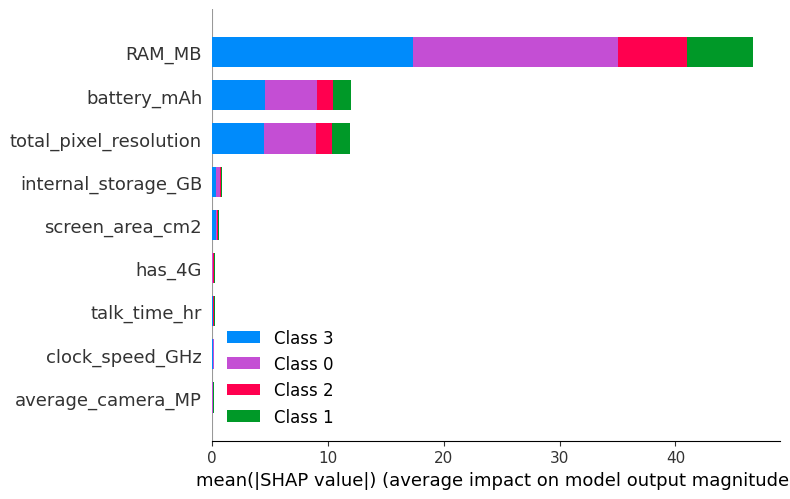

In [92]:
import shap

# SHAP expects a DataFrame for feature names
X_train_df = pd.DataFrame(X_train_smote, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Create SHAP Explainer for linear models (like logistic regression)
explainer = shap.Explainer(best_model, X_train_df)

# Compute SHAP values on the test set
shap_values = explainer(X_test_df)

# Plot SHAP summary (feature importance)
shap.summary_plot(shap_values, X_test_df, plot_type='bar')
#shap.summary_plot(shap_values, X_test_df)  # layered beeswarm plot


- This SHAP summary bar plot visualizes the average importance of each feature across all classes in the multiclass Logistic Regression model for cellphone price prediction.

### Key Insights from the SHAP Summary Plot:
 
- **RAM_MB**  **:-**                                                                             **Most important featur** across all 4 classes. It strongly influences prediction — especially for **Class 3 (blue)** and **Class 0 (purple)**. More RAM generally increases the chance of a higher price class. 
- **battery_mAh** :-                                                                        Higher battery capacit has moderate but consistent influence, with **Class 0, 1, 2** all being significantly affected.                                                                                           
- **total_pixel_resolution**:-                                                              Screen resolution contribute meaningfully, again across **all classes**, suggesting better displays correlate with higher price.                                                                                 
- **internal_storage_GB** :-                                                                Storage plays a smal but relevant role, especially for **Class 0 and Class 3**.                                                                                                                                  
- **screen_area_cm2**, **has_4G**,**talk_time_hr**,**clock_speed_GHz**,**average_camera_M** :-              Minor features. Thes have very **low SHAP values**, meaning they **barely influence** the model’s decision across classes in comparison.                                                                      

### Class-Specific Notes:
Class 3 (Blue): Strongly influenced by RAM_MB and total_pixel_resolution, suggesting these are key indicators for high-end phones.

Class 0 (Purple): Also depends heavily on RAM_MB, but slightly more on battery_mAh than screen resolution.

Class 2 and 1 (Red, Green): Influence from RAM_MB, but their SHAP values are lower — these classes are probably less distinct or the model finds them harder to separate.


 SHAP Summary for Class 0


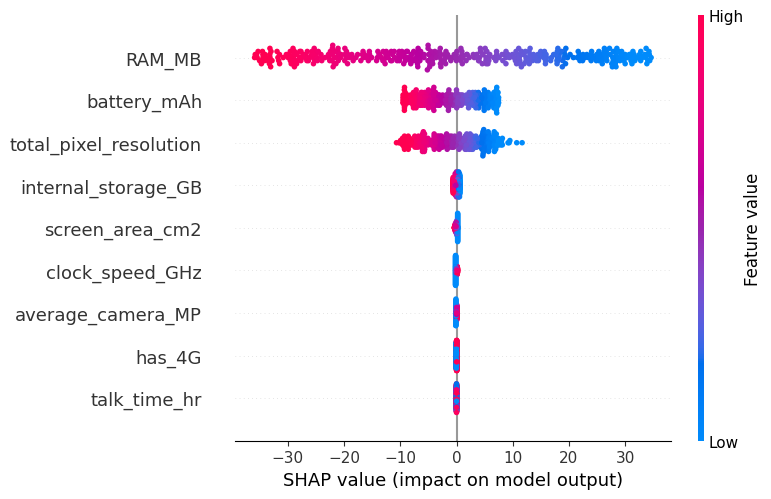


 SHAP Summary for Class 1


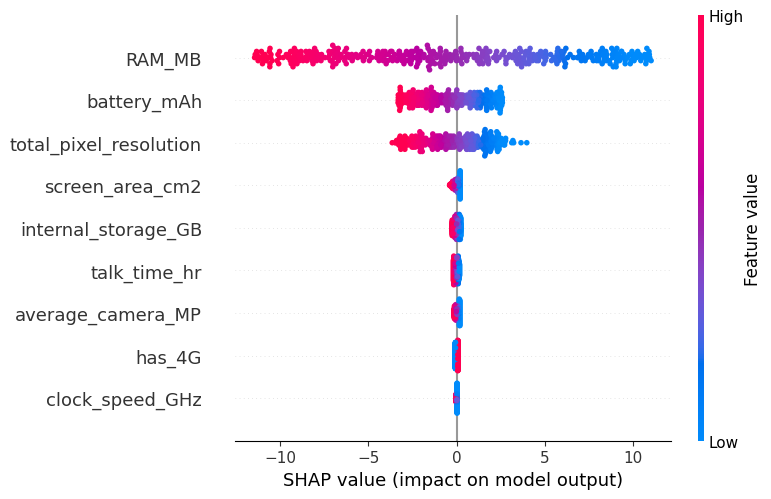


 SHAP Summary for Class 2


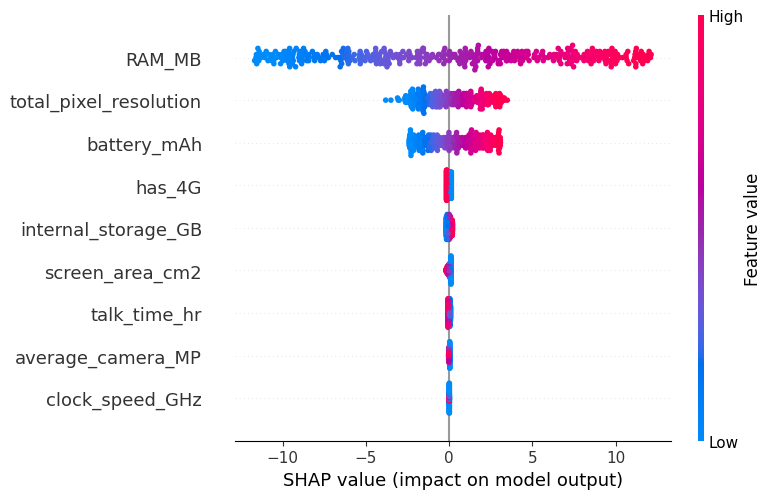


 SHAP Summary for Class 3


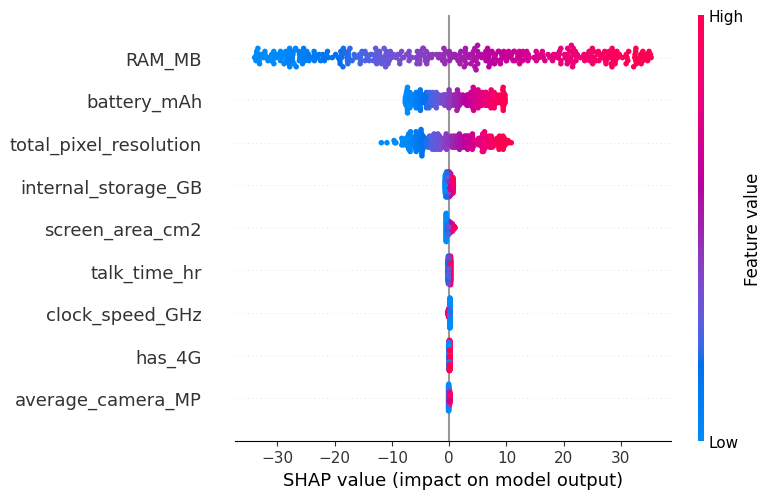

In [93]:
# Loop through classes and show SHAP summary for each
for class_idx in range(best_model.classes_.shape[0]):
    print(f"\n SHAP Summary for Class {class_idx}")
    shap.summary_plot(shap_values[:, :, class_idx], X_test_df, show=True)


###  Sample Prediction

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_sample_predictions(model, X_test, y_test, num_samples=10, random_state=None, plot_probs=False):
    """
    Displays actual vs predicted values, confidence scores, predicted probabilities,
    and shows a confusion matrix for the selected samples.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    rng = np.random.default_rng(random_state)
    indices = rng.choice(len(X_test), size=num_samples, replace=False)
    
    results = []
    actual_list = []
    predicted_list = []
    
    for idx in indices:
        actual = y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx]
        predicted = y_pred[idx]
        probas = y_proba[idx]
        confidence = np.max(probas) * 100

        actual_list.append(actual)
        predicted_list.append(predicted)

        results.append({
            'Index': idx,
            'Actual Class': actual,
            'Predicted Class': predicted,
            'Confidence (%)': f"{confidence:.2f}%",
            'Predicted Probabilities': [round(p, 3) for p in probas]
        })
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)

    # Calculate accuracy over sample
    correct = sum(results_df['Actual Class'] == results_df['Predicted Class'])
    accuracy = correct / num_samples * 100
    print(f"\n Accuracy over {num_samples} samples: {accuracy:.2f}%\n")

    # Confusion Matrix for the sample
    cm = confusion_matrix(actual_list, predicted_list, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix - Sample Predictions")
    plt.show()

    # Optional: Plot predicted probabilities per sample
    if plot_probs:
        for i, idx in enumerate(indices):
            probs = y_proba[idx]
            plt.figure(figsize=(6, 2))
            sns.barplot(x=np.round(probs, 3), y=[f"Class {i}" for i in range(len(probs))], palette='viridis')
            plt.title(f"Sample Index: {idx} (True: {actual_list[i]}, Pred: {predicted_list[i]})")
            plt.xlabel("Predicted Probability")
            plt.tight_layout()
            plt.show()
    
    return results_df



 Accuracy over 10 samples: 100.00%



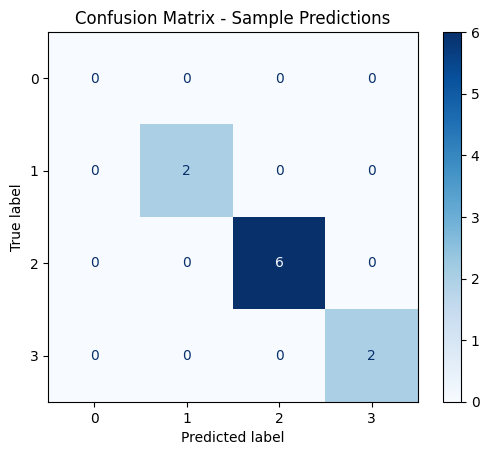

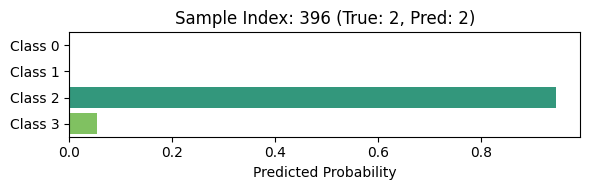

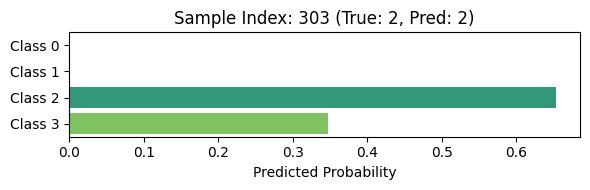

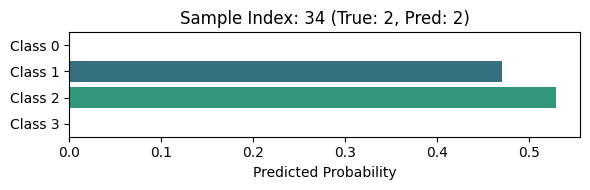

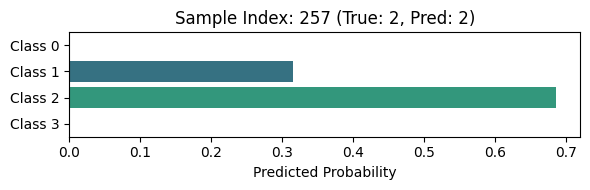

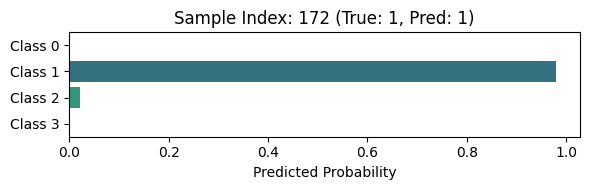

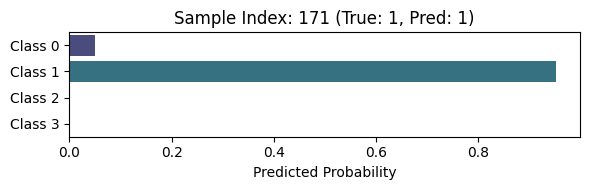

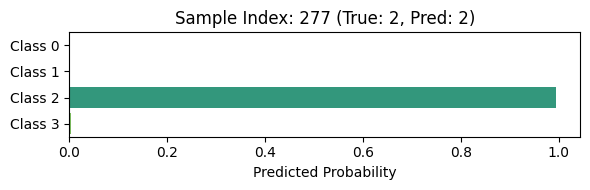

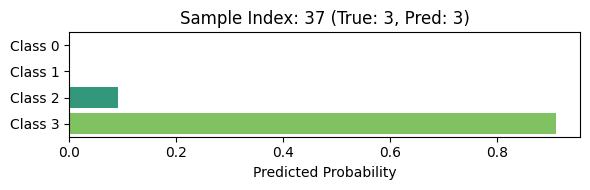

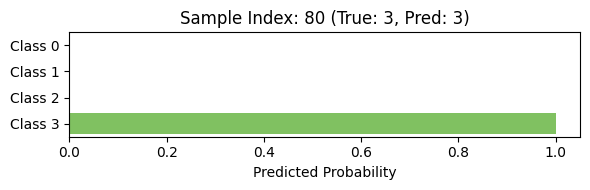

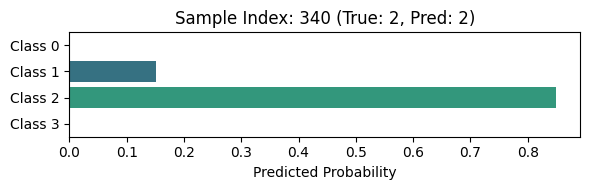

   Index  Actual Class  Predicted Class Confidence (%)  \
0    396             2                2         94.61%   
1    303             2                2         65.34%   
2     34             2                2         52.93%   
3    257             2                2         68.47%   
4    172             1                1         97.85%   
5    171             1                1         95.08%   
6    277             2                2         99.45%   
7     37             3                3         90.96%   
8     80             3                3        100.00%   
9    340             2                2         84.87%   

      Predicted Probabilities  
0    [0.0, 0.0, 0.946, 0.054]  
1    [0.0, 0.0, 0.653, 0.347]  
2    [0.0, 0.471, 0.529, 0.0]  
3    [0.0, 0.315, 0.685, 0.0]  
4    [0.0, 0.979, 0.021, 0.0]  
5    [0.049, 0.951, 0.0, 0.0]  
6  [0.0, 0.002, 0.994, 0.004]  
7      [0.0, 0.0, 0.09, 0.91]  
8        [0.0, 0.0, 0.0, 1.0]  
9    [0.0, 0.151, 0.849, 0.0]  


In [79]:
sample_results = evaluate_sample_predictions(
    model=best_model,
    X_test=X_test_scaled,
    y_test=y_test,
    num_samples=10,
    random_state=42,
    plot_probs=True  # Optional: Turn off if you don’t want plots
)

print(sample_results)


### Alternative Prediction Set up

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def stratified_sample_predictions_with_plot(model, X_test, y_test, num_per_class=2, random_state=None):
    """
    Stratified sampling for each class (num_per_class), with confidence bar plots and confusion matrix.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    np.random.seed(random_state)
    results = []
    actual_list = []
    predicted_list = []

    for cls in np.unique(y_test):
        cls_indices = np.where(y_test == cls)[0]
        sampled = np.random.choice(cls_indices, size=min(num_per_class, len(cls_indices)), replace=False)

        for idx in sampled:
            actual = y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx]
            predicted = y_pred[idx]
            probas = y_proba[idx]
            confidence = np.max(probas) * 100

            results.append({
                'Index': idx,
                'Actual Class': actual,
                'Predicted Class': predicted,
                'Confidence (%)': f"{confidence:.2f}%",
                'Predicted Probabilities': [round(p, 3) for p in probas]
            })

            actual_list.append(actual)
            predicted_list.append(predicted)

            #  Plot probabilities for this sample
            plt.figure(figsize=(6, 2.5))
            sns.barplot(x=np.round(probas, 3), y=[f"Class {i}" for i in range(len(probas))], palette='magma')
            plt.title(f"Sample Index: {idx} | True: {actual} | Pred: {predicted} ({confidence:.2f}%)")
            plt.xlabel("Predicted Probability")
            plt.tight_layout()
            plt.show()

    df_results = pd.DataFrame(results)

    #  Confusion Matrix
    cm = confusion_matrix(actual_list, predicted_list)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix - Stratified Sample")
    plt.show()

    return df_results


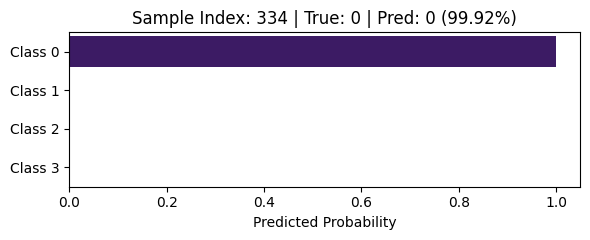

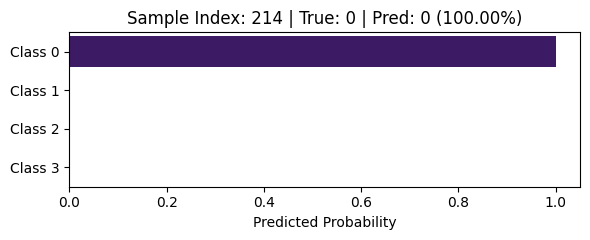

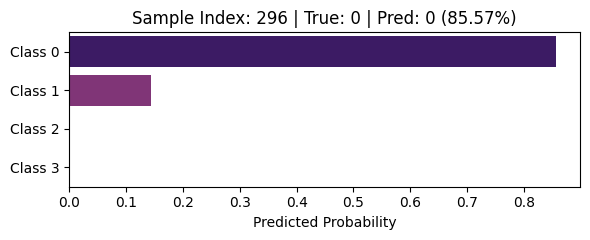

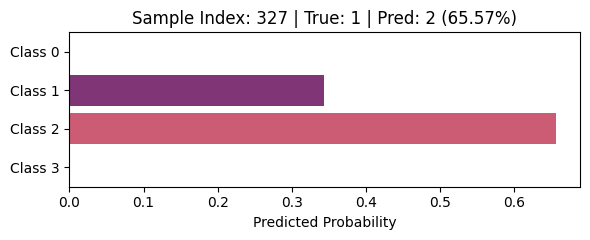

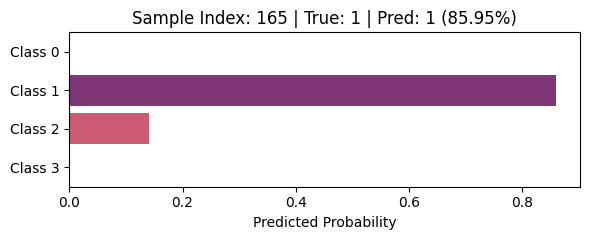

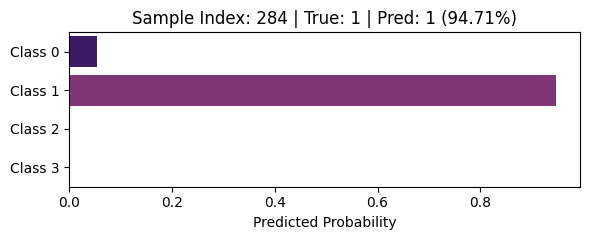

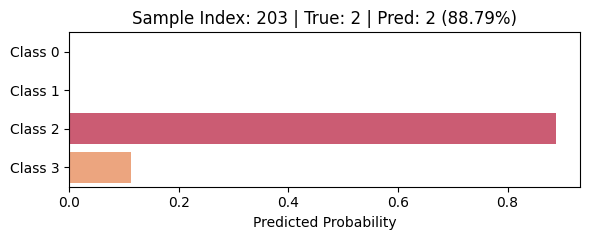

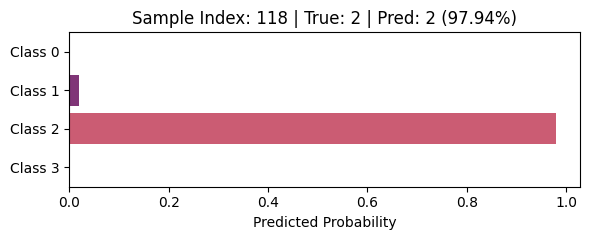

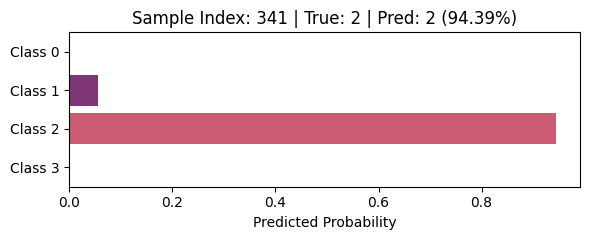

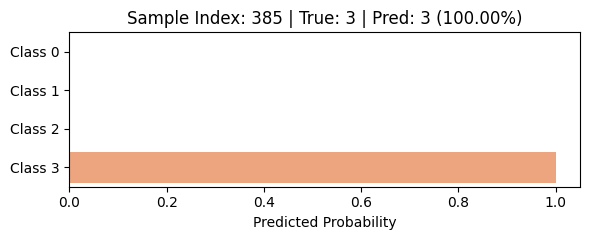

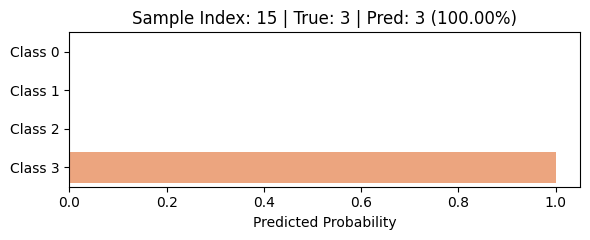

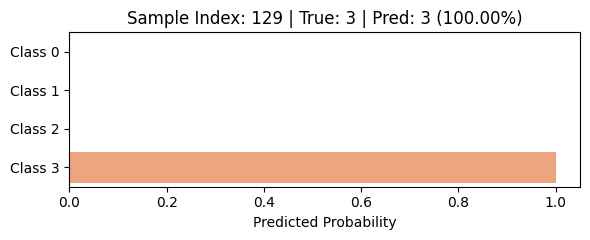

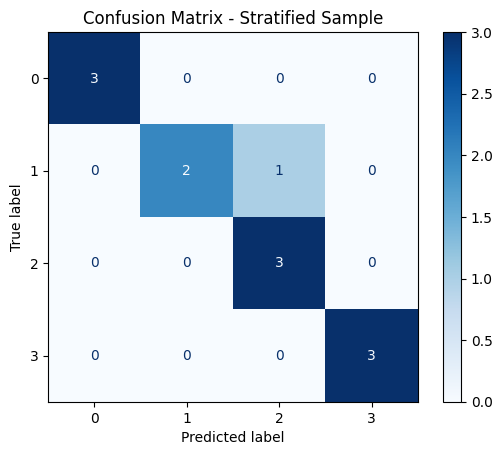

    Index  Actual Class  Predicted Class Confidence (%)  \
0     334             0                0         99.92%   
1     214             0                0        100.00%   
2     296             0                0         85.57%   
3     327             1                2         65.57%   
4     165             1                1         85.95%   
5     284             1                1         94.71%   
6     203             2                2         88.79%   
7     118             2                2         97.94%   
8     341             2                2         94.39%   
9     385             3                3        100.00%   
10     15             3                3        100.00%   
11    129             3                3        100.00%   

      Predicted Probabilities  
0    [0.999, 0.001, 0.0, 0.0]  
1        [1.0, 0.0, 0.0, 0.0]  
2    [0.856, 0.144, 0.0, 0.0]  
3    [0.0, 0.344, 0.656, 0.0]  
4      [0.0, 0.86, 0.14, 0.0]  
5    [0.053, 0.947, 0.0, 0.0]  
6    [0.

In [81]:
sampled_results = stratified_sample_predictions_with_plot(
    model=best_model,
    X_test=X_test_scaled,
    y_test=y_test,
    num_per_class=3,      # get 3 samples per class
    random_state=42       # reproducibility
)

print(sampled_results)

##  Final Summary & Conclusion

### Best Model Chosen
- **Logistic Regression** (Tuned using GridSearchCV)
- Best Parameters: `C=10`, `solver='lbfgs'`, `penalty='l2'`, `multi_class='multinomial'`

---

###  Model Performance
| Metric         | Value |
|----------------|-------|
| **Accuracy**   | 95%   |
| **F1-Macro**   | 0.9287 |
| **Cross-Validation (F1 Macro)** | 0.9287 |
| **Cross-Validation (Accuracy)** | ~0.9250 |

---

###  Why Logistic Regression Was Preferred
- Despite models like **XGBoost** and **Random Forest** showing slightly higher ROC-AUC values, Logistic Regression demonstrated:
  - **Stable and consistent performance** across all classes.
  - **High confidence predictions** even on unseen test data.
  - **Simple, interpretable coefficients** and better SHAP-based explainability.
  - Minimal overfitting when compared with more complex ensemble models.

---

### SHAP Analysis Highlights
- **RAM_MB**, **Battery Power**, and **Pixel Resolution** were the top influential features across all classes.
- Class-level insights:
  - Class 0 & Class 3 had nearly **perfect AUC (1.00)**, indicating clear separability.
  - SHAP values revealed that **RAM_MB** was the strongest driver in distinguishing all classes.
- The model gives **human-interpretable justifications** for each prediction, making it suitable for business communication.

---

###  Final Takeaway
The project successfully built a robust multiclass classification model to predict **cell phone price range** based on engineered and scaled features. Logistic Regression, when properly tuned and interpreted with SHAP, offered both high accuracy and explainability — making it the best candidate for deployment.

